# PART ONE :: Automobile Classification- UNSUPERVISED LEARNING

Brief Introduction

1. For this exercise we would be loading the file 'vehicle-1.csv'. Thereafter we would be categorizing the vehicles using clustering techniques (KMeans, Hierchical Clustering etc.) The goal would be to split the data into multiple categories to which it belongs i.e. Cars, Bus etc.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('vehicle-1.csv')

# Preliminary Analysis - Data Sanity Check

1. We will cover elements like size, shape of the data
2. Try to understand the dataset better interms of the number of elements, features etc.
3. Then we will try to see there are no missing values in the dataset and treat those if required

In [3]:
data.shape #846 rows and 19 columns

(846, 19)

In [4]:
data.dtypes 
#There is one column 'class' which is an object others are float or int. Lets investigate the possible values of 'class'

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
data['class'].value_counts() # okay so there is no problem here it is classification in text format which has been done
# We can convert it to 0,1,2 labels later on

car    429
bus    218
van    199
Name: class, dtype: int64

In [6]:
data.info() 
# Details about the datatypes; Infact the above two statements of shape & dtypes can be replaced by info only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [7]:
# There is a possibility that still within these features there could be some values which are blank
# Now doing a for loop to check for these

for col in data.columns:
    print ("# of ", col, " is null =", data[col].isnull().sum())
    
# As you can see there are a couple of values which are blank, majority in the skewness_about column 
# and also in the radius_ratio column

# These will have to be treated

# of  compactness  is null = 0
# of  circularity  is null = 5
# of  distance_circularity  is null = 4
# of  radius_ratio  is null = 6
# of  pr.axis_aspect_ratio  is null = 2
# of  max.length_aspect_ratio  is null = 0
# of  scatter_ratio  is null = 1
# of  elongatedness  is null = 1
# of  pr.axis_rectangularity  is null = 3
# of  max.length_rectangularity  is null = 0
# of  scaled_variance  is null = 3
# of  scaled_variance.1  is null = 2
# of  scaled_radius_of_gyration  is null = 2
# of  scaled_radius_of_gyration.1  is null = 4
# of  skewness_about  is null = 6
# of  skewness_about.1  is null = 1
# of  skewness_about.2  is null = 1
# of  hollows_ratio  is null = 0
# of  class  is null = 0


In [8]:
# Now we can quickly bring up the dataframe with the describe function to check for '0' in dataframe
data.describe()

# as we can see both skewness_about and skewness_about.1 both columns have minimum value as 0
# We might need to bring up the total number of rows where any column is a 0 and pring those out
# Then we can come back to this and try and understand the data after treating both BLANKS and '0' values

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [9]:
# As we can see from above there are multiple columns with '0 values'
# WoW there are 103 rows where there are 0's which will need to be treated
# These are primarily from the skewness_About and skewness_about.1

data[(data == 0).any(axis=1)]

# Now honestly speaking we do not have that much understanding of this domain
# it is quiet possible that within these two '0' is absolytely acceptable
# Therefore so that we do not mess up our data, before imputing we will go ahead and create two copies of this column
# i.e. With and Without Imputed values and we will look throughout our model to check both these sets seperately
# Something during the journey should help us understand whether the '0''s were supposed to be imputed or not


compactness  circularity  distance_circularity  radius_ratio  \
20            84         47.0                  75.0         153.0   
24            99         53.0                 105.0         219.0   
37            90         48.0                  86.0         306.0   
39            81         45.0                  68.0         169.0   
49            91         45.0                  79.0         176.0   
..           ...          ...                   ...           ...   
820           87         38.0                  71.0         123.0   
825           86         39.0                  84.0         149.0   
826           95         49.0                  92.0         193.0   
830           97         37.0                  70.0         173.0   
844           86         36.0                  78.0         146.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
20                   64.0                        6          154.0   
24                   66.0                       11          204.0   
37                  126.0                       49          153.0   
39                   73.0                        6          151.0   
49                   59.0                        9          163.0   
..                    ...                      ...            ...   
820                  53.0                        8          137.0   
825                  57.0                        8          156.0   
826                  62.0                       10          178.0   
830                  66.0                        7          151.0   
844                  58.0                        7          135.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
20            43.0                    19.0                        145   
24            32.0                    23.0                        165   
37            44.0                    19.0                        156   
39            44.0                    19.0                        146   
49            40.0                    20.0                        148   
..             ...                     ...                        ...   
820           49.0                    18.0                        127   
825           43.0                    20.0                        133   
826           37.0                    21.0                        154   
830           43.0                    19.0                        129   
844           50.0                    18.0                        124   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
20             175.0              354.0                      184.0   
24             221.0              623.0                      224.0   
37             272.0              346.0                      200.0   
39             173.0              336.0                      186.0   
49             184.0              404.0                      179.0   
..               ...                ...                        ...   
820            158.0              277.0                      145.0   
825            185.0              358.0                      157.0   
826            200.0              478.0                      171.0   
830            167.0              346.0                      119.0   
844            155.0              270.0                      148.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
20                          75.0             0.0               3.0   
24                          68.0             0.0               6.0   
37                         118.0             0.0              15.0   
39                          75.0             7.0               0.0   
49                          62.0             0.0              10.0   
..                           ...             ...               ...   
820                         75.0             0.0               9.0   
825                         74.0             0.0              23.0   

In [10]:
# Before creating the two column, let us first treat the missing data.
# We will do this seperately for the three classes

classValues = data['class'].value_counts().index
colNames = data.columns.to_list()[:-1] #Helps remove the class variable

for x in classValues:
    tempDF = data[data['class'] == x]
    for col in colNames:
        median = tempDF[col].median()
        data.loc[(data['class']==x) & (data[col].isnull() == True), col] = median # This will impute blanks with median

In [11]:
# Let's recheck to see if any blanks remain

for col in data.columns:
    print ("# of ", col, " is null =", data[col].isnull().sum())
    
# As you can see null and the best part is we have treated them with the median value for the class which will help
# improve our model later on 
# Now onto treating the 0 values

# of  compactness  is null = 0
# of  circularity  is null = 0
# of  distance_circularity  is null = 0
# of  radius_ratio  is null = 0
# of  pr.axis_aspect_ratio  is null = 0
# of  max.length_aspect_ratio  is null = 0
# of  scatter_ratio  is null = 0
# of  elongatedness  is null = 0
# of  pr.axis_rectangularity  is null = 0
# of  max.length_rectangularity  is null = 0
# of  scaled_variance  is null = 0
# of  scaled_variance.1  is null = 0
# of  scaled_radius_of_gyration  is null = 0
# of  scaled_radius_of_gyration.1  is null = 0
# of  skewness_about  is null = 0
# of  skewness_about.1  is null = 0
# of  skewness_about.2  is null = 0
# of  hollows_ratio  is null = 0
# of  class  is null = 0


In [12]:
# Now Treating '0' in two class, but we will keep a backup of the original dataframe and might use it later to see if replacing 
# the values with 0 actually made sense

dataOriginal = data

In [13]:
# Now imputing the values of 0 in two columns 'skewness_about' and 'skewness_about.1' per the class variable

for x in classValues:
    tempDF = data[data['class'] == x]
    median_SKA = tempDF['skewness_about'].median()
    median_SKA1 = tempDF['skewness_about.1'].median()
    data.loc[(data['class']==x) & (data['skewness_about'] == 0.0), 'skewness_about'] = median_SKA # This will impute blanks with median
    data.loc[(data['class']==x) & (data['skewness_about.1'] == 0.0), 'skewness_about.1'] = median_SKA1 # This will impute blanks with median

In [14]:
# Now lets check if we still have 0 remaining
data[(data == 0).any(axis=1)]

# As you can see all 0 values were imputed

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

# Exploratory Data Analysis (EDA)

In [15]:
# Let's bring up describe to understand the variation of our data
data.describe() 

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.826241             82.066194    168.916076   
std       8.234474     6.134340             15.754263     33.427561   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.250000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.680851                 8.567376     168.920804   
std                7.882557                 4.601217      33.199802   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.927896               20.579196                 147.998818   
std         7.813401                2.590879                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.643026         439.665485                 174.712766   
std          31.378020         176.492876                  32.546284   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         364.000000                 174.000000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.880615         12.998818   
std                       7.470873        4.488109          8.614904   
min                      59.000000        1.000000          1.000000   
25%                      67.000000        4.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.919622     195.632388  
std            6.152167       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

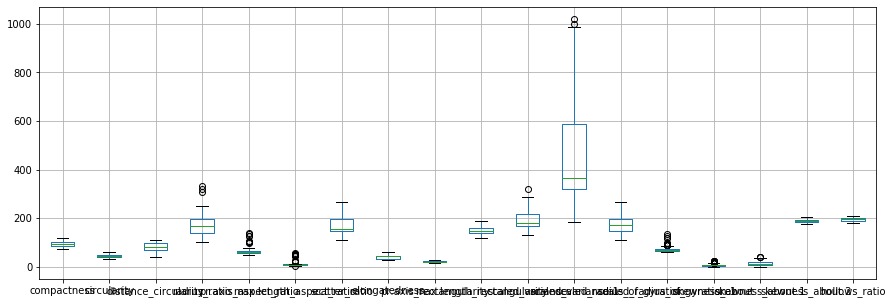

In [16]:
# Next onto plotting the box plot to see the variation in the data
data.boxplot(figsize=(15,5))
        
# This boxplot shows that for a number of features there are outliers which we would have to treat
# also we will have to see the distribution for each feature and treat all these outliers
# So lets start one feature at a time

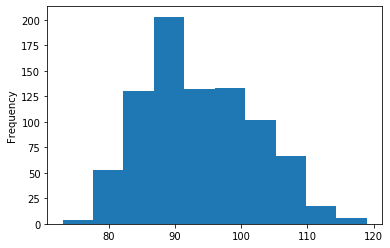

In [17]:
# 1. Distribution for Compactness Feature
data['compactness'].plot.hist() # slightly right skewed, no negative values

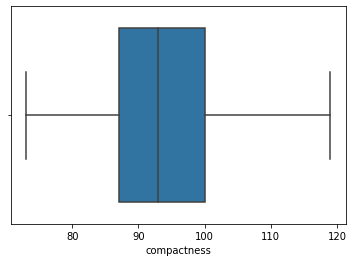

In [18]:
# 1. BoxPlot for Compactness Feature
sns.boxplot(data['compactness']) # No Outliers

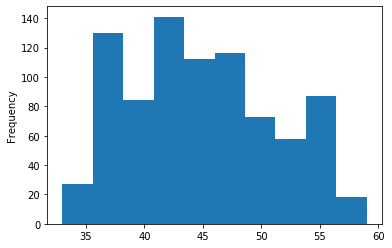

In [19]:
# 2. Distribution for Circularity Feature
data['circularity'].plot.hist() 
# can see multiple curves i.e. should have different clusters represented well, no negative values

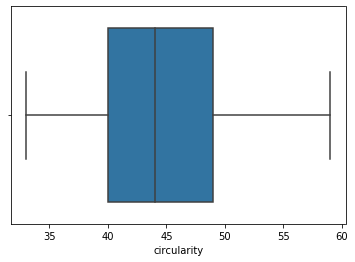

In [20]:
# 2. BoxPlot for Circularity Feature
sns.boxplot(data['circularity']) # No Outliers

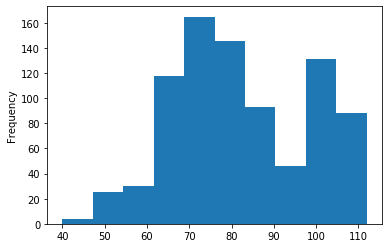

In [21]:
# 3. Distribution for distance_circularity Feature
data['distance_circularity'].plot.hist() # Two distinct peaks, again should be a good feature for classification, left skewed

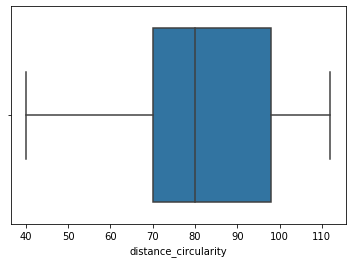

In [22]:
# 3. BoxPlot for distance_circularity Feature
sns.boxplot(data['distance_circularity']) # No Outliers

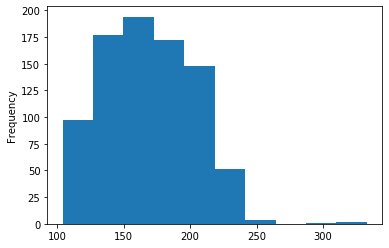

In [23]:
# 4. Distribution for radius_ratio Feature
data['radius_ratio'].plot.hist() 
# Right skewed, just by looking at this one can tell there are tails, hence should have outliers

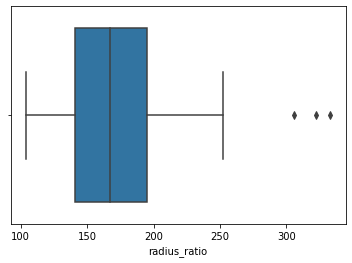

In [24]:
# 4. Distribution for radius_ratio Feature
sns.boxplot(data['radius_ratio']) 
# Quiet Evident there are three outlier dots here, which will have to be treated
# We will not this feature down to treat these outliers later

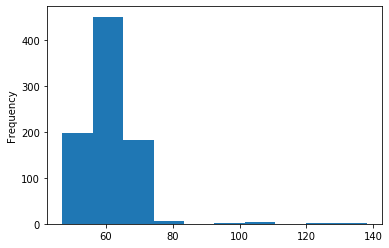

In [25]:
# 5. Distribution for pr.axis_aspect_ratio Feature
data['pr.axis_aspect_ratio'].plot.hist() 
# Extremely Right skewed, just by looking at this one can tell there are tails, hence should have outliers

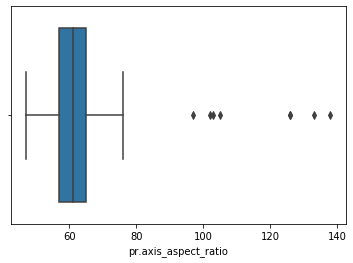

In [26]:
# 5. Distribution for pr.axis_aspect_ratio Feature
sns.boxplot(data['pr.axis_aspect_ratio']) 
# Quiet Evident there are outliers here which will have to be treated
# We will not this feature down to treat these outliers later

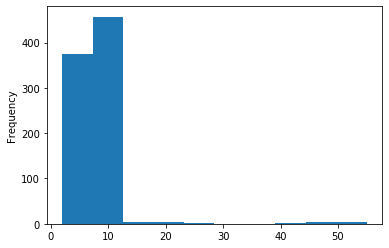

In [27]:
# 6. Distribution for max.length_aspect_ratio Feature
data['max.length_aspect_ratio'].plot.hist() 
# Extremely Right skewed, just by looking at this one can tell there are tails, hence should have outliers

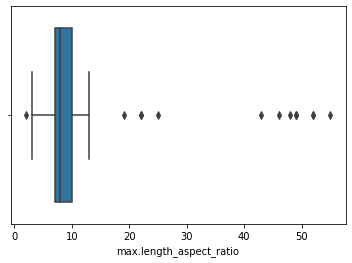

In [28]:
# 6. Distribution for max.length_aspect_ratio Feature
sns.boxplot(data['max.length_aspect_ratio']) 
# Quiet Evident there are too many outliers here which will have to be treated
# We will not this feature down to treat these outliers later

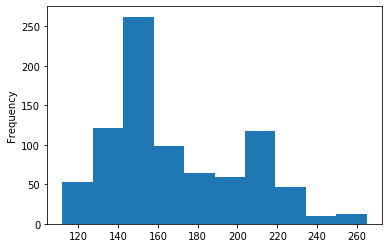

In [29]:
# 7. Distribution for scatter_ratio Feature
data['scatter_ratio'].plot.hist() 
# Can't see any outliers but can see two peaks here

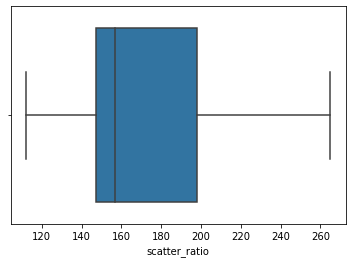

In [30]:
# 7. Distribution for scatter_ratio Feature
sns.boxplot(data['scatter_ratio']) 
# No outliers

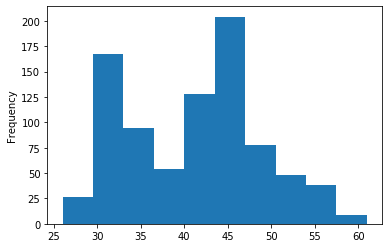

In [31]:
# 8. Distribution for elongatedness Feature
data['elongatedness'].plot.hist() 
# Can't see any outliers but can see two peaks here

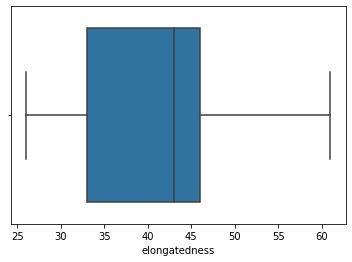

In [32]:
# 8. Distribution for elongatedness Feature
sns.boxplot(data['elongatedness']) 
# No Outliers

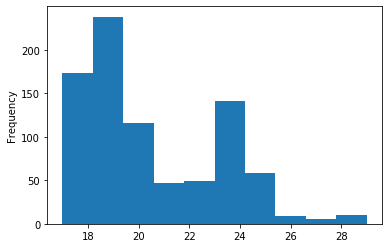

In [33]:
# 9. Distribution for pr.axis_rectangularity Feature
data['pr.axis_rectangularity'].plot.hist() 
# Can't see any outliers but can see two peaks here and is right skewed

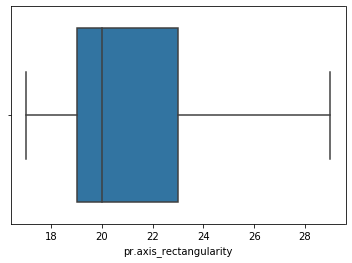

In [34]:
# 9. Distribution for pr.axis_rectangularity Feature
sns.boxplot(data['pr.axis_rectangularity']) 
# No Outliers

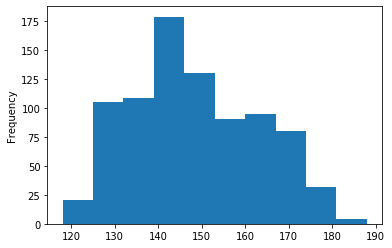

In [35]:
# 10. Distribution for max.length_rectangularity Feature
data['max.length_rectangularity'].plot.hist() 
# Almost a perfect normal distribution

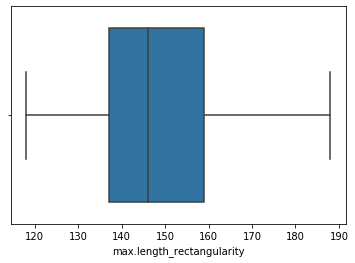

In [36]:
# 10. Distribution for max.length_rectangularity Feature
sns.boxplot(data['max.length_rectangularity']) 
# No Outliers

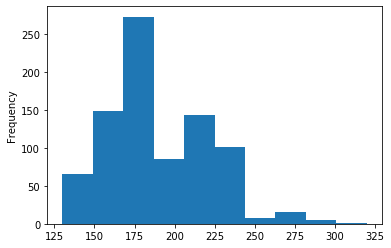

In [37]:
# 11. Distribution for scaled_variance Feature
data['scaled_variance'].plot.hist() 
# Right skewed, two peaks

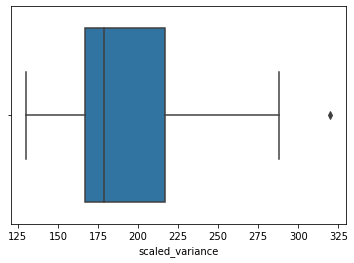

In [38]:
# 11. Distribution for scaled_variance Feature
sns.boxplot(data['scaled_variance']) 
# Has 1 outlier

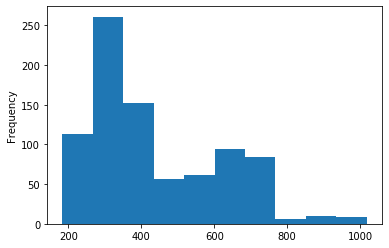

In [39]:
# 12. Distribution for scaled_variance.1 Feature
data['scaled_variance.1'].plot.hist() 
# Right skewed, two peaks

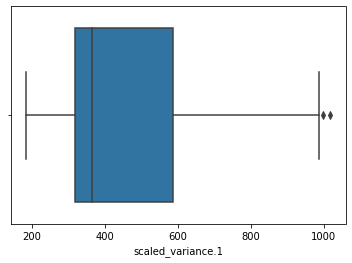

In [40]:
# 12. Distribution for scaled_variance.1 Feature
sns.boxplot(data['scaled_variance.1']) 
# Has outliers

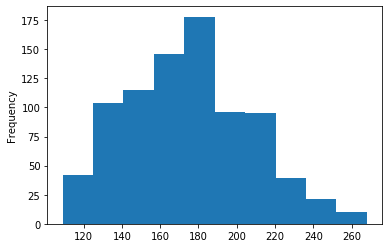

In [41]:
# 13. Distribution for scaled_radius_of_gyration Feature
data['scaled_radius_of_gyration'].plot.hist() 
# Almost perfect distribution, hardly any skew

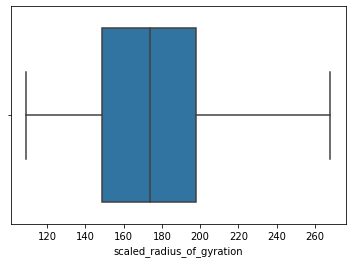

In [42]:
# 13. Distribution for scaled_radius_of_gyration Feature
sns.boxplot(data['scaled_radius_of_gyration']) 
# No outliers

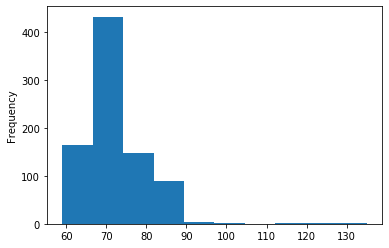

In [43]:
# 14. Distribution for scaled_radius_of_gyration.1 Feature
data['scaled_radius_of_gyration.1'].plot.hist() 
# Right skewed and definately has outliers

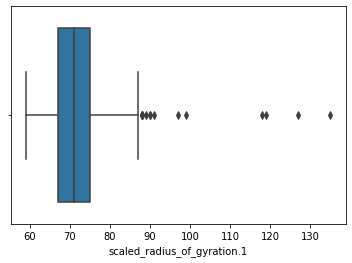

In [44]:
# 14. Distribution for scaled_radius_of_gyration.1 Feature
sns.boxplot(data['scaled_radius_of_gyration.1']) 
# Multiple outliers

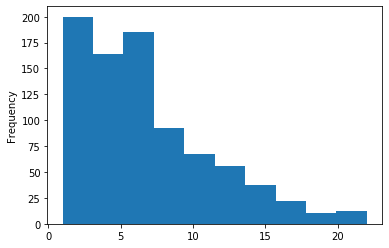

In [45]:
# 15. Distribution for skewness_about Feature
data['skewness_about'].plot.hist() 
# Right skewed

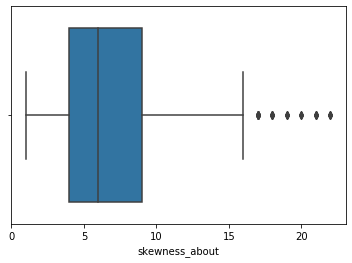

In [46]:
# 15. Distribution for skewness_about Feature
sns.boxplot(data['skewness_about']) 
# Multiple outliers

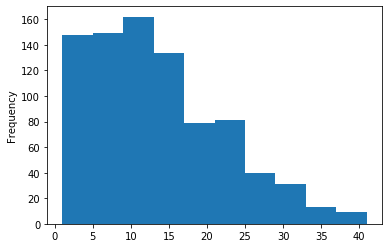

In [47]:
# 16. Distribution for skewness_about.1 Feature
data['skewness_about.1'].plot.hist() 
# Right skewed

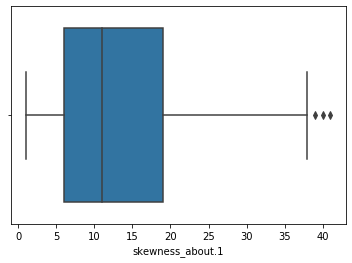

In [48]:
# 16. Distribution for skewness_about.1 Feature
sns.boxplot(data['skewness_about.1']) 
# Multiple outliers

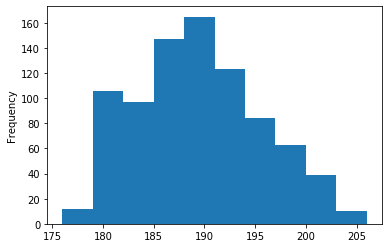

In [49]:
# 17. Distribution for skewness_about.2 Feature
data['skewness_about.2'].plot.hist() 
# Close to center

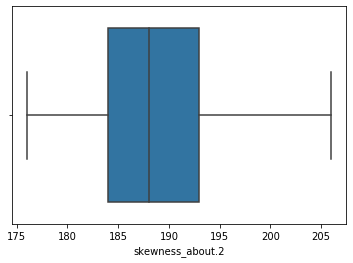

In [50]:
# 17. Distribution for skewness_about.2 Feature
sns.boxplot(data['skewness_about.2']) 
# No outliers

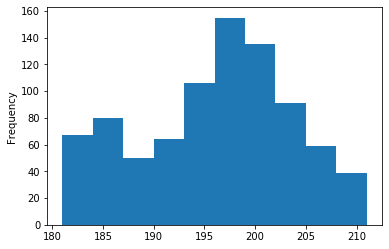

In [51]:
# 18. Distribution for hollows_ratio Feature
data['hollows_ratio'].plot.hist() 
# Twin peaks

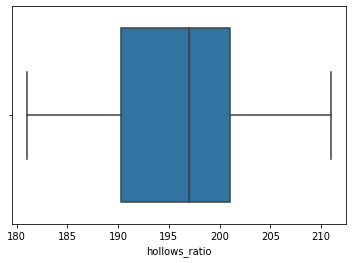

In [52]:
# 18. Distribution for hollows_ratio Feature
sns.boxplot(data['hollows_ratio']) 
# No outliers

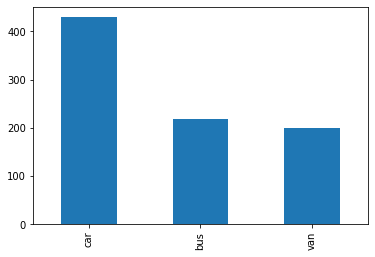

In [53]:
# 19. Distribution of the category variable 'class' 

data['class'].value_counts().plot.bar() 


# Slight amount of imbalance in the dataset to the ratio of 2:1, anything above 5:1 would have requested us 
# to use techniques like SMOTE.

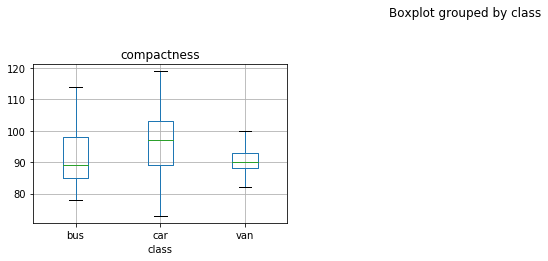

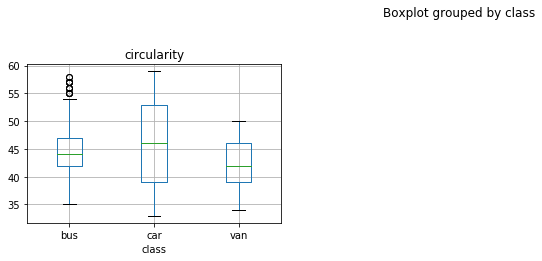

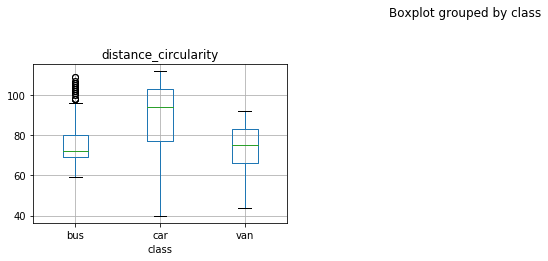

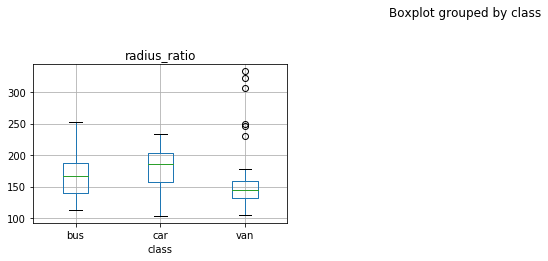

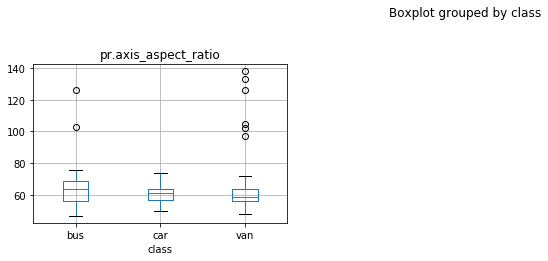

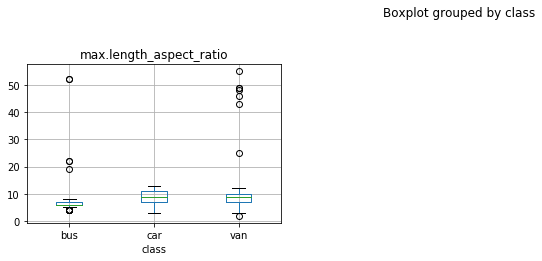

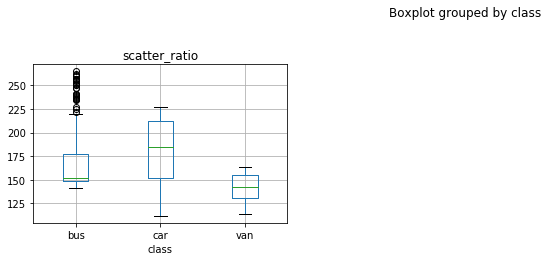

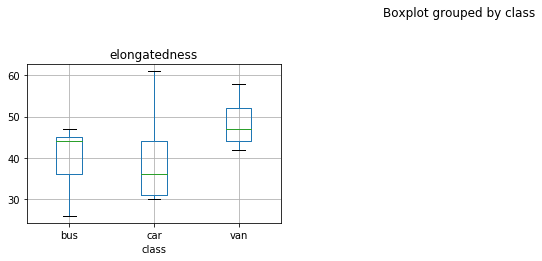

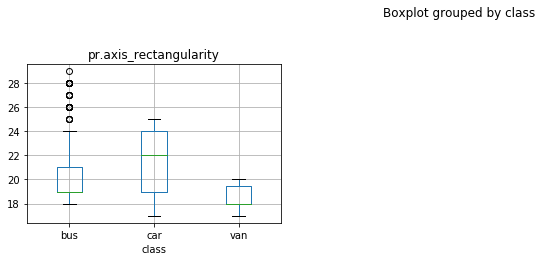

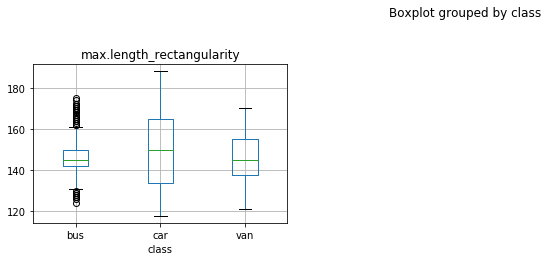

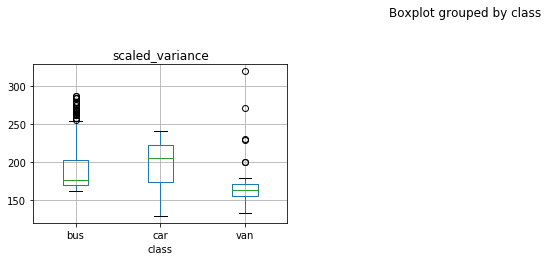

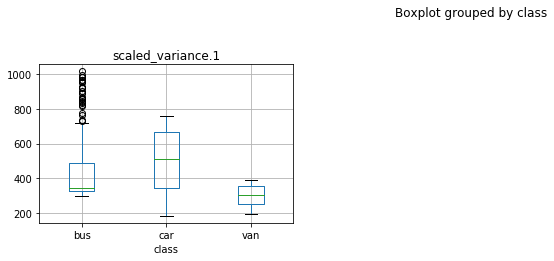

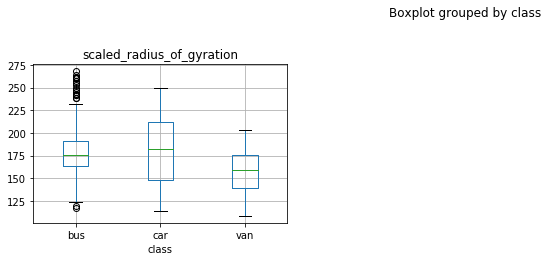

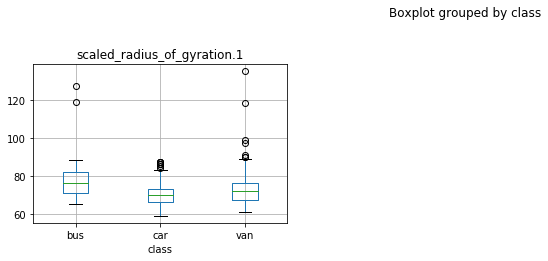

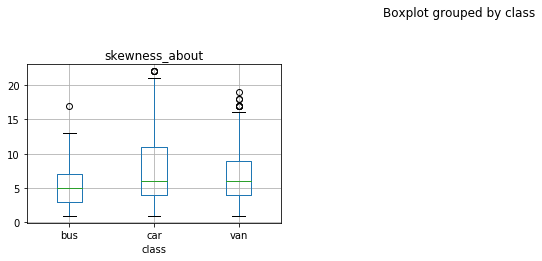

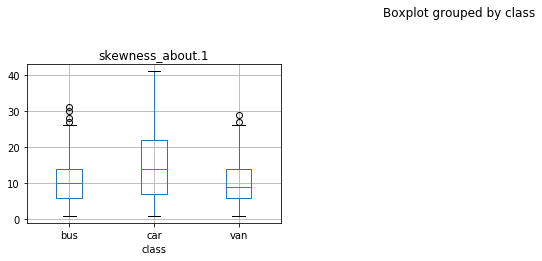

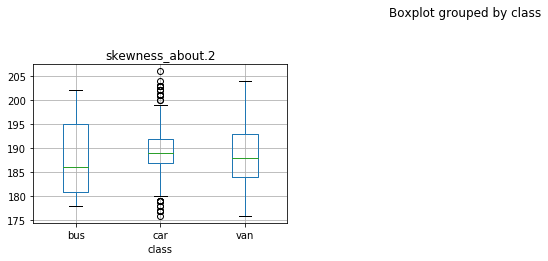

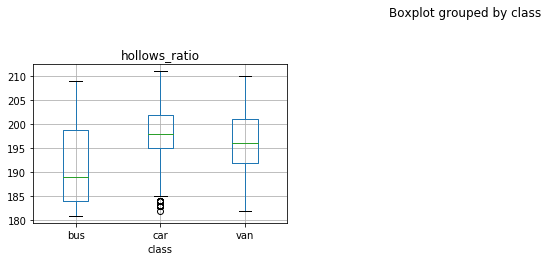

In [54]:
# Next we can also plot the variable from the category to understand the data better
continous =  data.columns.to_list()[:-1]

for x in continous:
    data.boxplot(column=x,by='class', figsize=(15,10), layout=(3,3)) #<- Plot the continous variables by categorical 
        
# Using the function we will not only be able to view the boxplot for all the features but will also be able to study
# that using the category dispersions

# Overall Takeaways (Understanding of Data Dispersion)

1. There are 19 Features in total; 1 Class Feature and 18 Continous Features
2. Most of the features are right skewed, some however are centrally distributed
3. There are 8 features which have outliers which would need to be treated
4. Some of the features have two or more peaks which hint that seperating the underlying class for these might be easier
5. Compactness - Vans are more compact as compared to the distribution of cars
6. Circularity & distance_circularity - outliers exists for bus
7. At a class level there are many outliers for different classes primariy BUS, then VAN and finally CAR

# After a solid understanding of the data, now onto treating the outliers

In [55]:
# Let's quickly write a function to calculate key values for a boxplot

def boxplotVals(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)

    IQR = Q3 - Q1

    LowerValue = Q1 - (IQR*1.5)
    UpperValue = Q3 + (IQR*1.5)
    
    print(f'Quartile 1 {Q1}')
    print(f'Quartile 3 {Q3}')
    print(f'Inter Quartile Range {IQR}')
    print(f'Lower Whisker is At: {LowerValue}')
    print(f'Upper Whisker is At: {UpperValue}')
    
    return(LowerValue,UpperValue)

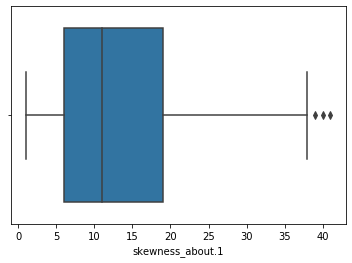

In [56]:
#1. Treating for skewness_about.1

sns.boxplot(data['skewness_about.1'])

In [57]:
lower, upper = boxplotVals(data['skewness_about.1'])
pd.crosstab(data['skewness_about.1'],data['class'])

# As you can see all values above 38.5 should be normalized i.e. for 39, 40 and 41 and these belong to Car. So will use the 
# mode of the car variable to substantiate these

Quartile 1 6.0
Quartile 3 19.0
Inter Quartile Range 13.0
Lower Whisker is At: -13.5
Upper Whisker is At: 38.5


class             bus  car  van
skewness_about.1               
1.0                15   16    7
2.0                 9   19    9
3.0                 8   14   10
4.0                13   18   10
5.0                 7   20    9
6.0                11   14   12
7.0                12   16   16
8.0                14    8   10
9.0                 8   17   25
10.0               17   12    9
11.0               19   18    9
12.0               11    9    8
13.0                8   12   10
14.0               16   24   10
15.0                4   12    7
16.0                7   15    9
17.0                8    4    8
18.0                2   12    3
19.0                6   11    3
20.0                4   15    3
21.0                3   22    4
22.0                5   14    1
23.0                3   12    4
24.0                0   13    0
25.0                1   10    0
26.0                3    5    1
27.0                1    5    1
28.0                1   12    0
29.0                0   11    1
30.0                1    7    0
31.0                1    4    0
32.0                0    6    0
33.0                0    5    0
34.0                0    1    0
35.0                0    4    0
36.0                0    3    0
38.0                0    6    0
39.0                0    1    0
40.0                0    1    0
41.0                0    1    0

In [58]:
# This will help impute values for 'skewness_about.1' which are greater than 38.5 according to the class

for x in classValues:
    tempDF = data[data['class'] == x]
    median = tempDF['skewness_about.1'].median()
    data.loc[(data['class']==x) & (data['skewness_about.1'] > 38.5), 'skewness_about.1'] = median

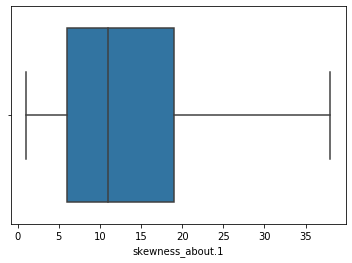

In [59]:
# Checking if the skewness has gone

sns.boxplot(data['skewness_about.1']) # It has indeed

In [60]:
# we can also check the value no other category was tweaked only the one which had greater than 38.5 in value

pd.crosstab(data['skewness_about.1'],data['class'])

class             bus  car  van
skewness_about.1               
1.0                15   16    7
2.0                 9   19    9
3.0                 8   14   10
4.0                13   18   10
5.0                 7   20    9
6.0                11   14   12
7.0                12   16   16
8.0                14    8   10
9.0                 8   17   25
10.0               17   12    9
11.0               19   18    9
12.0               11    9    8
13.0                8   12   10
14.0               16   27   10
15.0                4   12    7
16.0                7   15    9
17.0                8    4    8
18.0                2   12    3
19.0                6   11    3
20.0                4   15    3
21.0                3   22    4
22.0                5   14    1
23.0                3   12    4
24.0                0   13    0
25.0                1   10    0
26.0                3    5    1
27.0                1    5    1
28.0                1   12    0
29.0                0   11    1
30.0                1    7    0
31.0                1    4    0
32.0                0    6    0
33.0                0    5    0
34.0                0    1    0
35.0                0    4    0
36.0                0    3    0
38.0                0    6    0

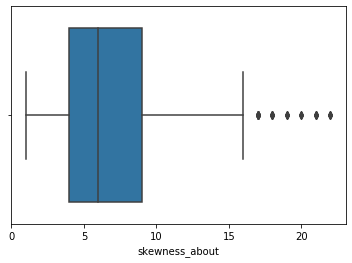

In [61]:
#2. Treating for skewness_about

sns.boxplot(data['skewness_about'])

In [62]:
lower, upper = boxplotVals(data['skewness_about'])
pd.crosstab(data['skewness_about'],data['class'])

# As you can see all values above 16.5 should be normalized i.e. for 17 thru 22 and these belong to the three different classes.
# SO we will fix this

Quartile 1 4.0
Quartile 3 9.0
Inter Quartile Range 5.0
Lower Whisker is At: -3.5
Upper Whisker is At: 16.5


class           bus  car  van
skewness_about               
1.0              22   38   21
2.0              19   29   15
3.0              17   26   13
4.0              28   25   17
5.0              45   35   14
6.0              25   73   27
7.0              18   22   20
8.0              15   19   13
9.0              14   22   10
10.0              6   21    9
11.0              4   20    7
12.0              2   18   10
13.0              2   18    6
14.0              0   14    4
15.0              0   15    4
16.0              0   10    1
17.0              1    5    5
18.0              0    4    2
19.0              0    3    1
20.0              0    3    0
21.0              0    5    0
22.0              0    4    0

In [63]:
# This will help impute values for 'skewness_about.1' which are greater than 38.5 according to the class

for x in classValues:
    tempDF = data[data['class'] == x]
    median = tempDF['skewness_about'].median()
    data.loc[(data['class']==x) & (data['skewness_about'] > 16.5), 'skewness_about'] = median

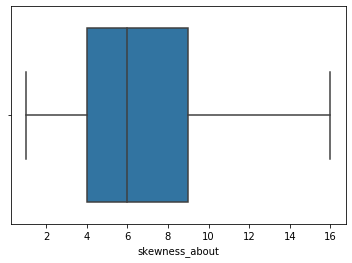

In [64]:
# Checking if the skewness has gone

sns.boxplot(data['skewness_about']) # It has indeed

In [65]:
# also checking this feature using a crosstab. All above 16.5 have gone

pd.crosstab(data['skewness_about'],data['class'])

class           bus  car  van
skewness_about               
1.0              22   38   21
2.0              19   29   15
3.0              17   26   13
4.0              28   25   17
5.0              46   35   14
6.0              25   97   35
7.0              18   22   20
8.0              15   19   13
9.0              14   22   10
10.0              6   21    9
11.0              4   20    7
12.0              2   18   10
13.0              2   18    6
14.0              0   14    4
15.0              0   15    4
16.0              0   10    1

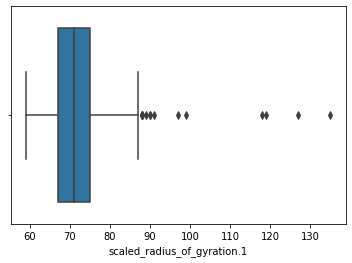

In [66]:
#3. Treating for scaled_radius_of_gyration.1

sns.boxplot(data['scaled_radius_of_gyration.1'])

In [67]:
lower, upper = boxplotVals(data['scaled_radius_of_gyration.1'])
pd.crosstab(data['scaled_radius_of_gyration.1'],data['class'])

# As you can see all values above 87 should be normalized

Quartile 1 67.0
Quartile 3 75.0
Inter Quartile Range 8.0
Lower Whisker is At: 55.0
Upper Whisker is At: 87.0


class                        bus  car  van
scaled_radius_of_gyration.1               
59.0                           0    1    0
60.0                           0    2    0
61.0                           0    9    2
62.0                           0   12    6
63.0                           0   16    8
64.0                           0   25   13
65.0                           3   20    8
66.0                           4   28    8
67.0                           5   35   13
68.0                           7   27    5
69.0                          15   20    9
70.0                           9   37    9
71.0                          13   43   12
72.0                          16   45   14
73.0                           8   27   11
74.0                          12   29   12
75.0                          11   11   16
76.0                           8    8   10
77.0                           8    5    7
78.0                           7    2    8
79.0                           5    3    3
80.0                          11    4    3
81.0                          14    3    2
82.0                          11    4    2
83.0                           9    4    0
84.0                           5    1    1
85.0                          19    1    4
86.0                           6    3    3
87.0                           6    4    1
88.0                           4    0    1
89.0                           0    0    1
90.0                           0    0    2
91.0                           0    0    1
97.0                           0    0    1
99.0                           0    0    1
118.0                          0    0    1
119.0                          1    0    0
127.0                          1    0    0
135.0                          0    0    1

In [68]:
# This will help impute values for 'skewness_about.1' which are greater than 38.5 according to the class

for x in classValues:
    tempDF = data[data['class'] == x]
    median = tempDF['scaled_radius_of_gyration.1'].median()
    data.loc[(data['class']==x) & (data['scaled_radius_of_gyration.1'] > 87), 'scaled_radius_of_gyration.1'] = median

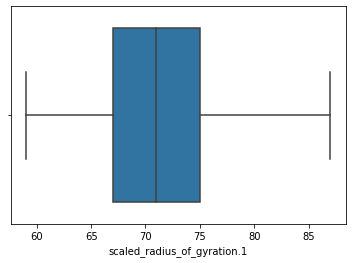

In [69]:
# Checking if the skewness has gone

sns.boxplot(data['scaled_radius_of_gyration.1']) # It has indeed

In [70]:
# also checking this feature using a crosstab. All above 87 have gone

pd.crosstab(data['scaled_radius_of_gyration.1'],data['class'])

class                        bus  car  van
scaled_radius_of_gyration.1               
59.0                           0    1    0
60.0                           0    2    0
61.0                           0    9    2
62.0                           0   12    6
63.0                           0   16    8
64.0                           0   25   13
65.0                           3   20    8
66.0                           4   28    8
67.0                           5   35   13
68.0                           7   27    5
69.0                          15   20    9
70.0                           9   37    9
71.0                          13   43   12
72.0                          16   45   23
73.0                           8   27   11
74.0                          12   29   12
75.0                          11   11   16
76.0                          14    8   10
77.0                           8    5    7
78.0                           7    2    8
79.0                           5    3    3
80.0                          11    4    3
81.0                          14    3    2
82.0                          11    4    2
83.0                           9    4    0
84.0                           5    1    1
85.0                          19    1    4
86.0                           6    3    3
87.0                           6    4    1

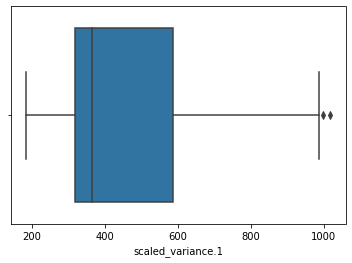

In [71]:
#4. Treating for scaled_variance.1

sns.boxplot(data['scaled_variance.1'])

In [72]:
lower, upper = boxplotVals(data['scaled_variance.1'])
pd.crosstab(data['scaled_variance.1'],data['class'])

# As you can see all values above 989.5 should be normalized. All belong to the bus class

Quartile 1 318.25
Quartile 3 586.75
Inter Quartile Range 268.5
Lower Whisker is At: -84.5
Upper Whisker is At: 989.5


class              bus  car  van
scaled_variance.1               
184.0                0    1    0
191.0                0    1    0
192.0                0    1    0
193.0                0    1    0
194.0                0    0    1
...                ...  ...  ...
968.0                1    0    0
982.0                1    0    0
987.0                1    0    0
998.0                1    0    0
1018.0               1    0    0

[422 rows x 3 columns]

In [73]:
# This will help impute values for 'skewness_about.1' which are greater than 38.5 according to the class

for x in classValues:
    tempDF = data[data['class'] == x]
    median = tempDF['scaled_variance.1'].median()
    data.loc[(data['class']==x) & (data['scaled_variance.1'] > 989.5), 'scaled_variance.1'] = median

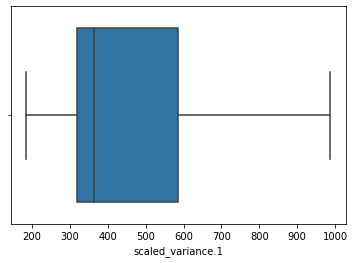

In [74]:
# Checking if the skewness has gone

sns.boxplot(data['scaled_variance.1']) # It has indeed

In [75]:
pd.crosstab(data['scaled_variance.1'],data['class'])
# As you can see values above 989.5 have been removed

class              bus  car  van
scaled_variance.1               
184.0                0    1    0
191.0                0    1    0
192.0                0    1    0
193.0                0    1    0
194.0                0    0    1
...                ...  ...  ...
957.0                1    0    0
966.0                1    0    0
968.0                1    0    0
982.0                1    0    0
987.0                1    0    0

[420 rows x 3 columns]

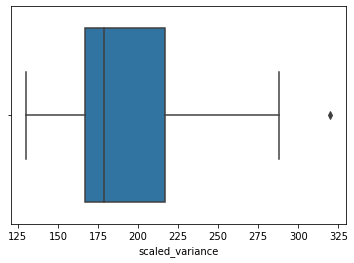

In [76]:
#5. Treating for scaled_variance.1

sns.boxplot(data['scaled_variance'])

In [77]:
lower, upper = boxplotVals(data['scaled_variance'])
pd.crosstab(data['scaled_variance'],data['class'])

# As you can see all values above 292 should be normalized. All belong to the bus class

Quartile 1 167.0
Quartile 3 217.0
Inter Quartile Range 50.0
Lower Whisker is At: 92.0
Upper Whisker is At: 292.0


class            bus  car  van
scaled_variance               
130.0              0    1    0
131.0              0    1    0
132.0              0    1    0
134.0              0    0    1
135.0              0    3    3
...              ...  ...  ...
280.0              3    0    0
285.0              3    0    0
287.0              1    0    0
288.0              1    0    0
320.0              0    0    1

[128 rows x 3 columns]

In [78]:
# This will help impute values for 'skewness_about.1' which are greater than 292 according to the class

for x in classValues:
    tempDF = data[data['class'] == x]
    median = tempDF['scaled_variance'].median()
    data.loc[(data['class']==x) & (data['scaled_variance'] > 292), 'scaled_variance'] = median

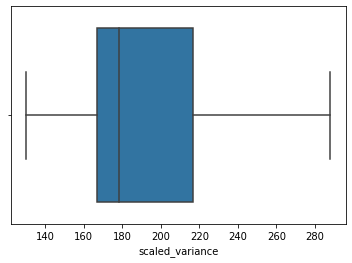

In [79]:
# Checking if the skewness has gone

sns.boxplot(data['scaled_variance']) # It has indeed

In [80]:
pd.crosstab(data['scaled_variance'],data['class'])
# As you can see values above 292 have been removed

class            bus  car  van
scaled_variance               
130.0              0    1    0
131.0              0    1    0
132.0              0    1    0
134.0              0    0    1
135.0              0    3    3
...              ...  ...  ...
278.0              1    0    0
280.0              3    0    0
285.0              3    0    0
287.0              1    0    0
288.0              1    0    0

[127 rows x 3 columns]

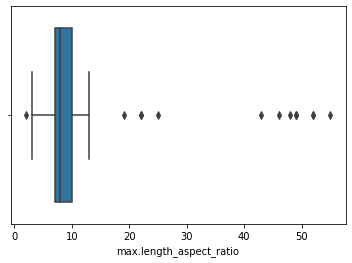

In [81]:
#6. Treating for scaled_variance.1

sns.boxplot(data['max.length_aspect_ratio'])

In [82]:
lower, upper = boxplotVals(data['max.length_aspect_ratio'])
pd.crosstab(data['max.length_aspect_ratio'],data['class'])

# As you can see all values above 14.5 and below 2.5 should be normalized.

Quartile 1 7.0
Quartile 3 10.0
Inter Quartile Range 3.0
Lower Whisker is At: 2.5
Upper Whisker is At: 14.5


class                    bus  car  van
max.length_aspect_ratio               
2.0                        0    0    1
3.0                        0    2    2
4.0                        7    9    2
5.0                       26   15   10
6.0                       78   35   19
7.0                       80   62   26
8.0                       22   58   33
9.0                        0   60   34
10.0                       0   80   32
11.0                       0   78   30
12.0                       0   27    3
13.0                       0    3    0
19.0                       1    0    0
22.0                       2    0    0
25.0                       0    0    1
43.0                       0    0    1
46.0                       0    0    1
48.0                       0    0    1
49.0                       0    0    2
52.0                       2    0    0
55.0                       0    0    1

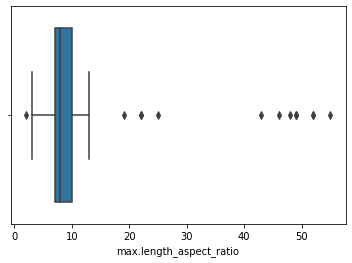

In [83]:
# Checking if the skewness has gone

sns.boxplot(data['max.length_aspect_ratio']) # It has indeed

In [84]:
# This will help impute values for 'skewness_about.1' which are greater than 292 according to the class

for x in classValues:
    tempDF = data[data['class'] == x]
    median = tempDF['max.length_aspect_ratio'].median()
    data.loc[(data['class']==x) & (data['max.length_aspect_ratio'] > 14.5), 'max.length_aspect_ratio'] = median
    data.loc[(data['class']==x) & (data['max.length_aspect_ratio'] < 2.5), 'max.length_aspect_ratio'] = median

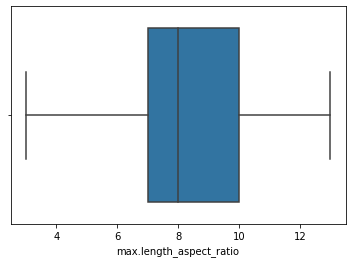

In [85]:
# Checking if the skewness has gone

sns.boxplot(data['max.length_aspect_ratio']) # It has indeed

In [86]:
pd.crosstab(data['max.length_aspect_ratio'],data['class'])
# As you can see values above 14.5 and below 2.5 have been removed

class                    bus  car  van
max.length_aspect_ratio               
3.0                        0    2    2
4.0                        7    9    2
5.0                       26   15   10
6.0                       83   35   19
7.0                       80   62   26
8.0                       22   58   33
9.0                        0   60   42
10.0                       0   80   32
11.0                       0   78   30
12.0                       0   27    3
13.0                       0    3    0

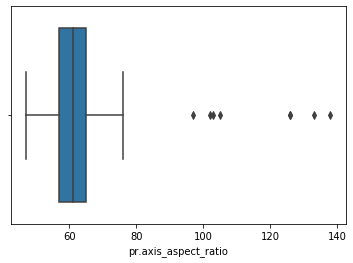

In [87]:
#7. Treating for scaled_variance.1

sns.boxplot(data['pr.axis_aspect_ratio'])

In [88]:
lower, upper = boxplotVals(data['pr.axis_aspect_ratio'])
pd.crosstab(data['pr.axis_aspect_ratio'],data['class'])

# As you can see all values above 77 should be normalized.

Quartile 1 57.0
Quartile 3 65.0
Inter Quartile Range 8.0
Lower Whisker is At: 45.0
Upper Whisker is At: 77.0


class                 bus  car  van
pr.axis_aspect_ratio               
47.0                    2    0    0
48.0                    1    0    3
49.0                    1    0    2
50.0                    3    1    1
51.0                    7    1    3
52.0                    3    2    9
53.0                    8   13    6
54.0                   12   16   10
55.0                    7   19   11
56.0                   13   28   16
57.0                    7   29    8
58.0                    4   22   17
59.0                    6   43   15
60.0                    5   33    8
61.0                    8   27    8
62.0                    6   42   10
63.0                    4   28   13
64.0                   18   30   22
65.0                   13   20    5
66.0                   10   17   10
67.0                    7   16    5
68.0                   12   15    7
69.0                   13   10    2
70.0                   10    7    1
71.0                   10    5    0
72.0                    7    2    1
73.0                    6    1    0
74.0                    7    2    0
75.0                    5    0    0
76.0                    1    0    0
97.0                    0    0    1
102.0                   0    0    1
103.0                   1    0    0
105.0                   0    0    1
126.0                   1    0    1
133.0                   0    0    1
138.0                   0    0    1

In [89]:
# This will help impute values for 'pr.axis_aspect_ratio'

for x in classValues:
    tempDF = data[data['class'] == x]
    median = tempDF['pr.axis_aspect_ratio'].median()
    data.loc[(data['class']==x) & (data['pr.axis_aspect_ratio'] > 77), 'pr.axis_aspect_ratio'] = median

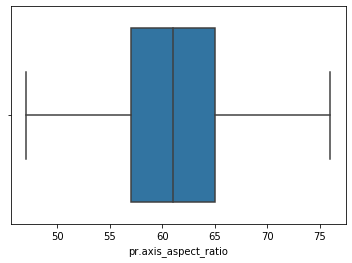

In [90]:
# Checking if the skewness has gone

sns.boxplot(data['pr.axis_aspect_ratio']) # It has indeed

In [91]:
pd.crosstab(data['pr.axis_aspect_ratio'],data['class'])
# As you can see values above 77 have been removed

class                 bus  car  van
pr.axis_aspect_ratio               
47.0                    2    0    0
48.0                    1    0    3
49.0                    1    0    2
50.0                    3    1    1
51.0                    7    1    3
52.0                    3    2    9
53.0                    8   13    6
54.0                   12   16   10
55.0                    7   19   11
56.0                   13   28   16
57.0                    7   29    8
58.0                    4   22   17
59.0                    6   43   21
60.0                    5   33    8
61.0                    8   27    8
62.0                    6   42   10
63.0                    4   28   13
64.0                   20   30   22
65.0                   13   20    5
66.0                   10   17   10
67.0                    7   16    5
68.0                   12   15    7
69.0                   13   10    2
70.0                   10    7    1
71.0                   10    5    0
72.0                    7    2    1
73.0                    6    1    0
74.0                    7    2    0
75.0                    5    0    0
76.0                    1    0    0

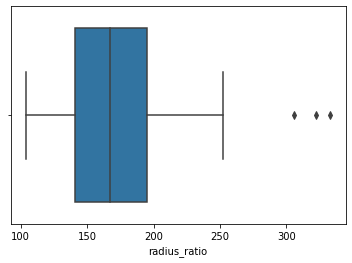

In [92]:
#8. Treating for radius_ratio

sns.boxplot(data['radius_ratio'])

In [93]:
lower, upper = boxplotVals(data['radius_ratio'])
pd.crosstab(data['radius_ratio'],data['class'])

# As you can see all values above 276 should be normalized.

Quartile 1 141.0
Quartile 3 195.0
Inter Quartile Range 54.0
Lower Whisker is At: 60.0
Upper Whisker is At: 276.0


class         bus  car  van
radius_ratio               
104.0           0    1    0
105.0           0    0    1
109.0           0    0    1
110.0           0    1    2
111.0           0    1    3
...           ...  ...  ...
250.0           0    0    1
252.0           1    0    0
306.0           0    0    1
322.0           0    0    1
333.0           0    0    1

[135 rows x 3 columns]

In [94]:
# This will help impute values for 'pr.axis_aspect_ratio'

for x in classValues:
    tempDF = data[data['class'] == x]
    median = tempDF['radius_ratio'].median()
    data.loc[(data['class']==x) & (data['radius_ratio'] > 276), 'radius_ratio'] = median

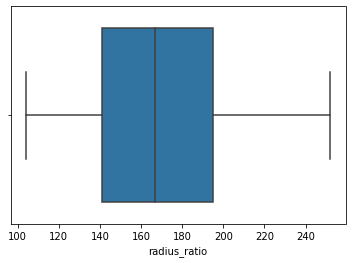

In [95]:
# Checking if the skewness has gone

sns.boxplot(data['radius_ratio']) # It has indeed

In [96]:
pd.crosstab(data['radius_ratio'],data['class'])
# As you can see values above 276 have been removed

class         bus  car  van
radius_ratio               
104.0           0    1    0
105.0           0    0    1
109.0           0    0    1
110.0           0    1    2
111.0           0    1    3
...           ...  ...  ...
235.0           1    0    0
238.0           1    0    0
246.0           1    0    1
250.0           0    0    1
252.0           1    0    0

[132 rows x 3 columns]

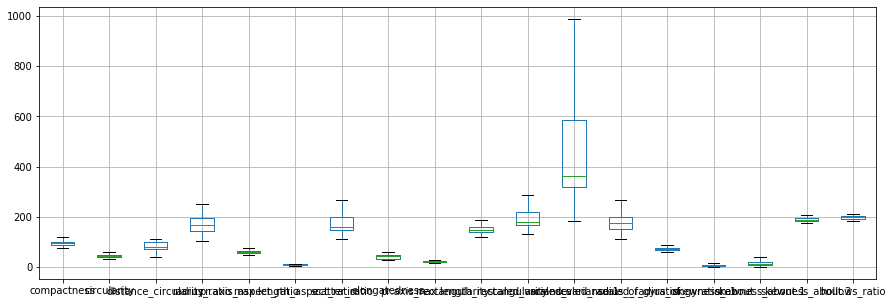

In [97]:
# In a nutshell doing a boxplot again to show Variances have dissapeared

data.boxplot(figsize=(15,5))
        
# As You can See there are no Outliers in teh data

# Now after treating the Data for Outliers lets look at the pair plot and the correlation analysis

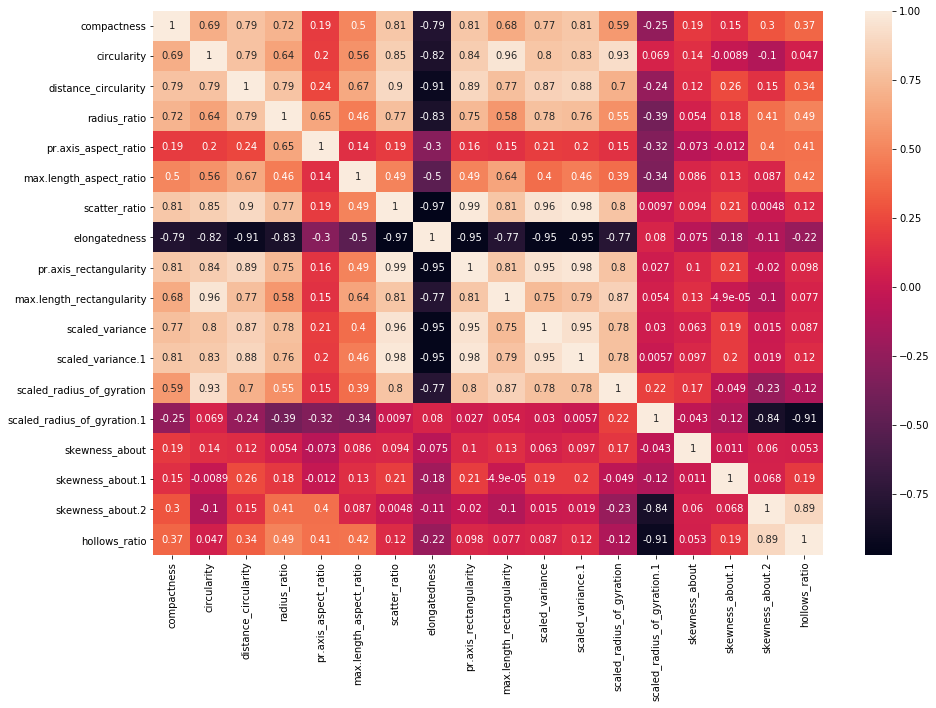

In [98]:
corr = data.corr(method='pearson')
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)

# Correlation Analysis 
1. 'Elongatedness' has a negative correlation with a number of features which stands out
2. 'Scatter_Ratio' has a positive correlation with a number of variables
3. Features like scaled_radious_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollow_ratio <- These interesting show no relationship amongst themselves and number of other features

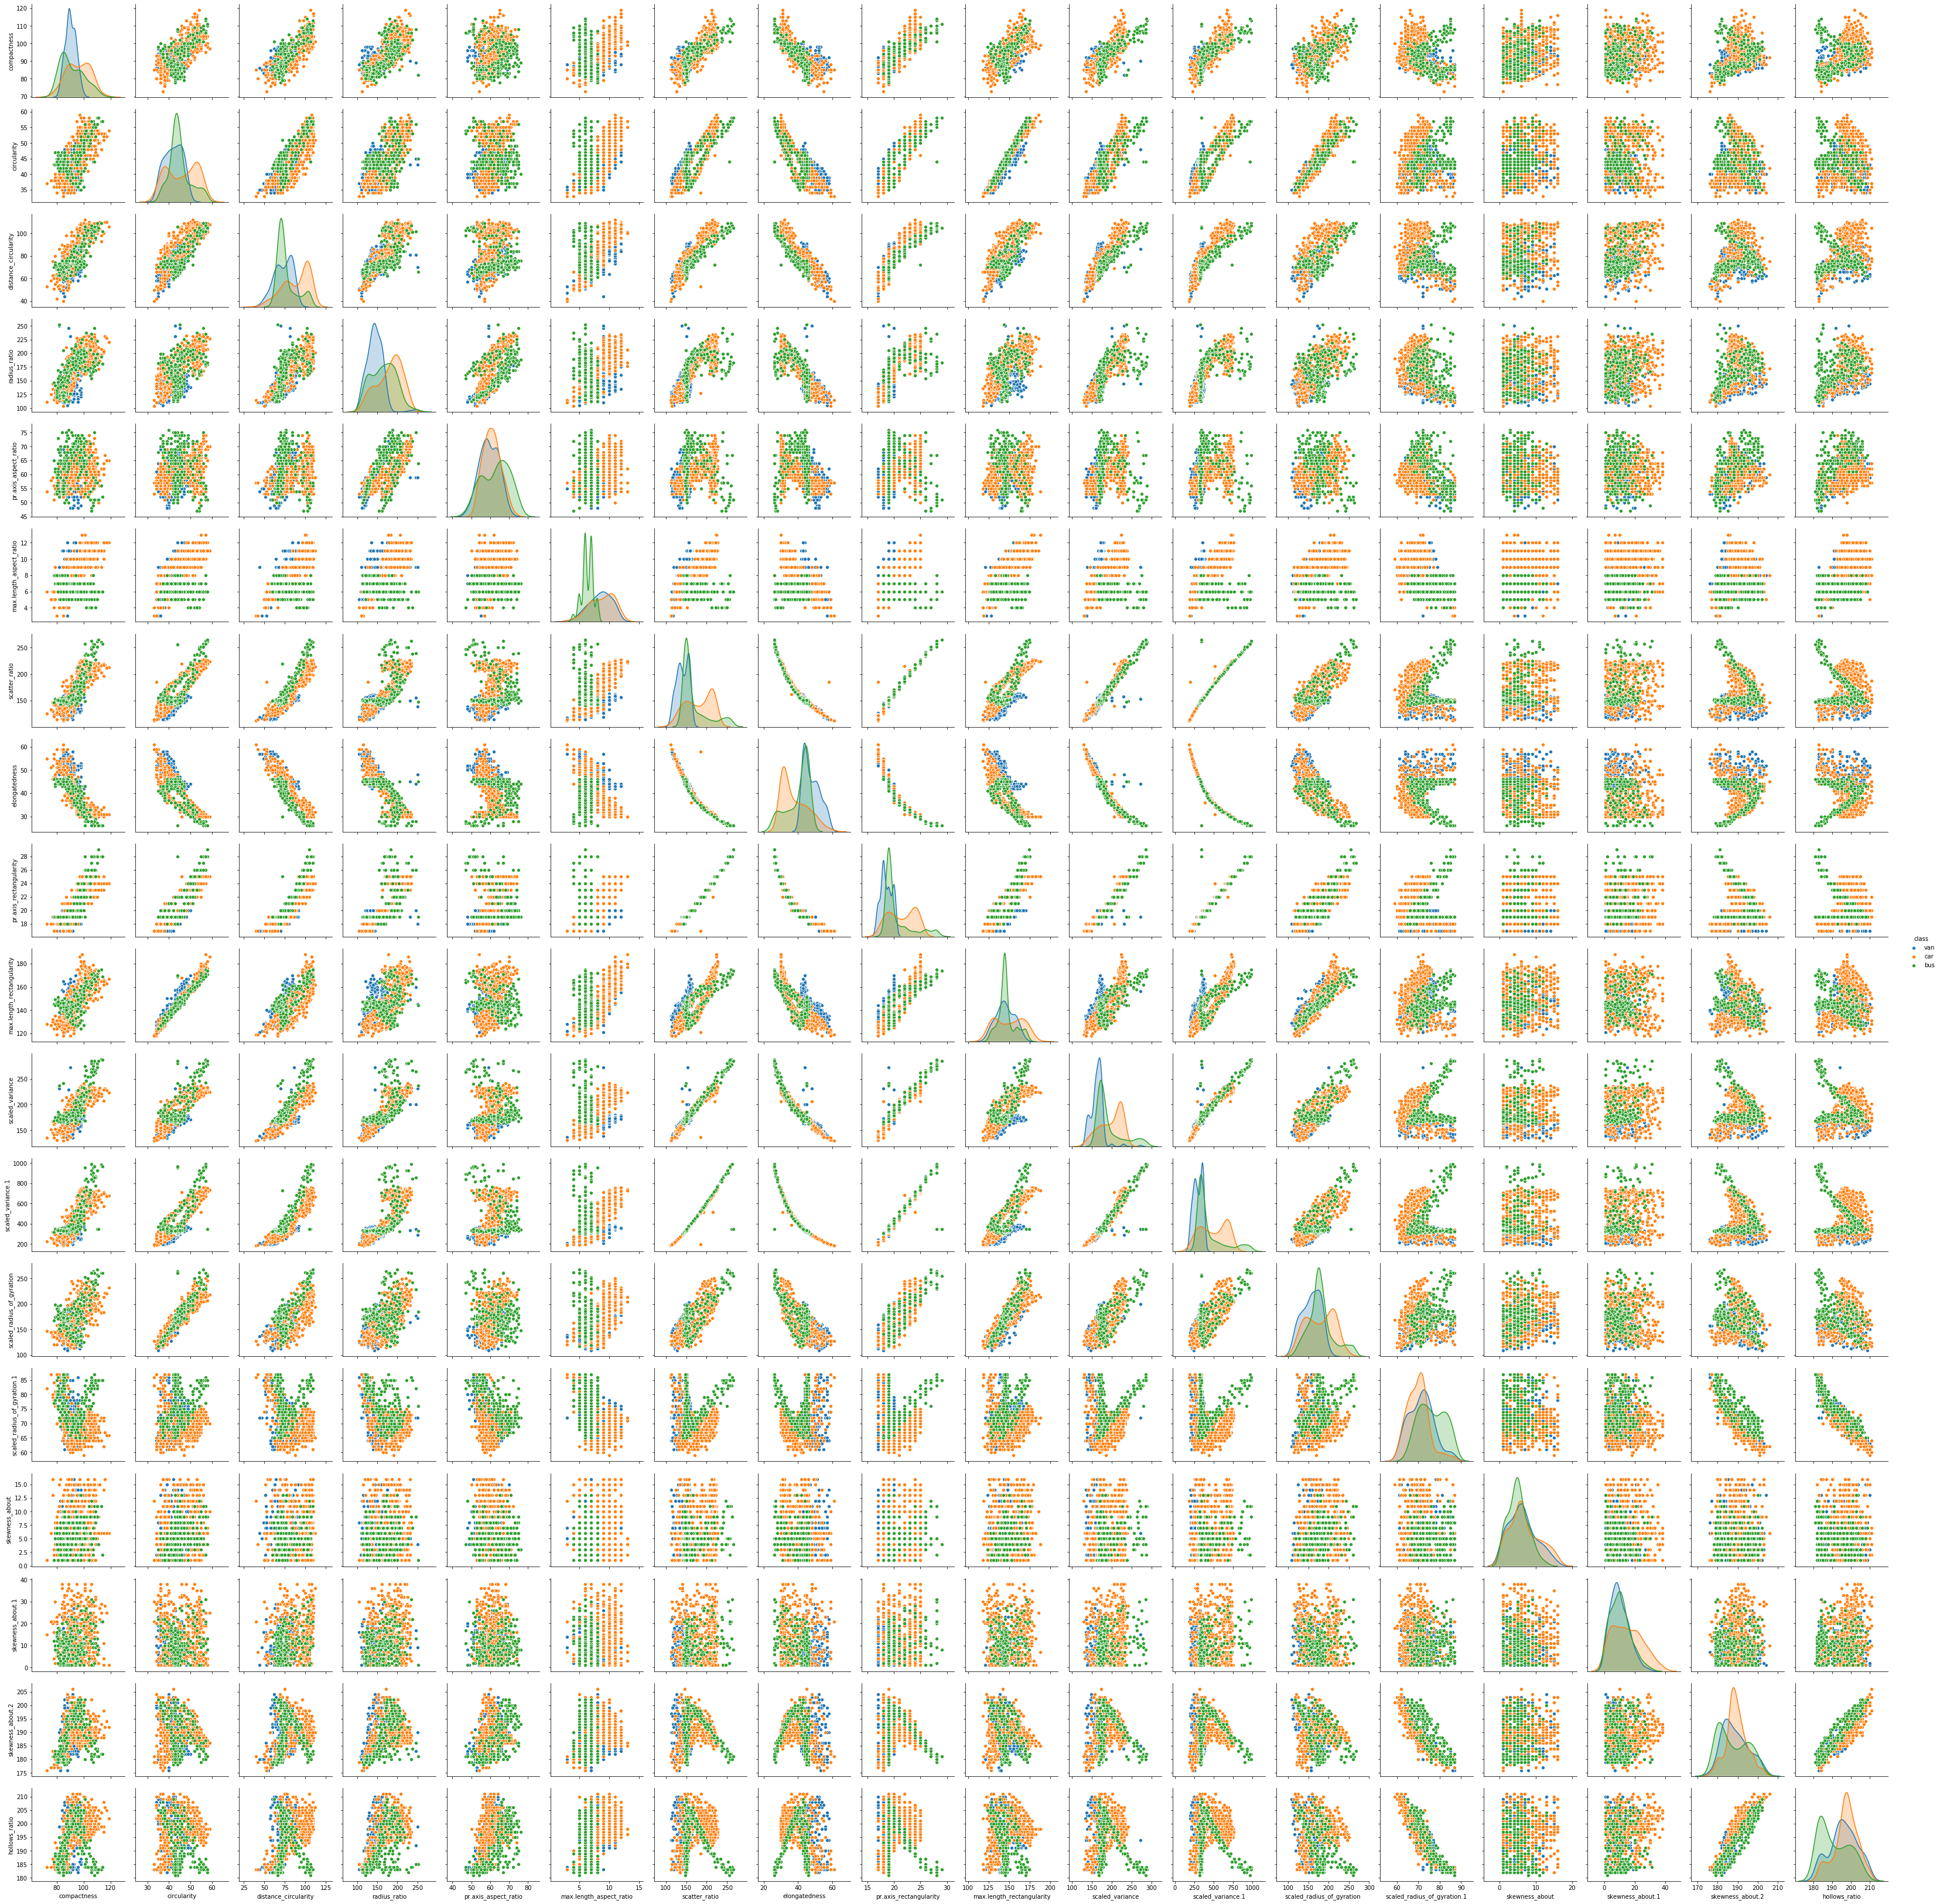

In [99]:
sns.pairplot(data,diag_kind='kde', hue='class')

# Pairplot Analysis :
1. Features like radius_ratio, distance_circularity etc. seperate the features really well
2. Max_legth_aspect_ratio seems to seperate classes really well across the classes
3. There are a number of features with positive (scatter_ratio) and negative (elongatedness) correlation across a number of features
4. There are other variables as well which show a positive correlation with certain other features e.g. (max_length_regularity and circularity).

# Using the SVM Model without doing PCA

In [100]:
# Running the SVM model on the original features

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [101]:
# Replacing the class variable with numbers
data['class'] = data['class'].replace('van',0)
data['class'] = data['class'].replace('car',1)
data['class'] = data['class'].replace('bus',2)

X = data.drop('class', axis=1)
y = data['class']

# Since we have labelled data we can do a train, test split and even get the accuracy from the SVM model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 592 samples.
Testing set has 254 samples.


### 1. SVM without Standardization and Without PCA (Non Optimized w.r.t. 'Cost Function' and Linear Kernel)

In [102]:
# Creating the model (Without PCA And Non-Optimized)
model = SVC(kernel='linear').fit(X_train,y_train)

# Calculating Accuracy and Other Scores
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

acc_score_train = accuracy_score(y_train,y_pred_train)
acc_score_test = accuracy_score(y_test,y_pred_test)
print(f'Accuracy for Test : {round(acc_score_test*100,2)}%')
print(f'Accuracy for Train : {round(acc_score_train*100,2)}%')

Accuracy for Test : 92.52%
Accuracy for Train : 97.47%


### 2. SVM With Standardization and Without PCA (Non Optimized w.r.t. 'Cost Function' and Linear Kernel)

In [103]:
# Creating the model (WITHOUT PCA And Non Optimized)
scaler = StandardScaler()
X_trainSS = scaler.fit_transform(X_train) # Scale and Transfrom the Training Data

model = SVC(kernel='linear').fit(X_trainSS,y_train)

# Calculating Accuracy and Other Scores
y_pred_train = model.predict(X_trainSS)

X_testSS = scaler.transform(X_test)   # Only Transfrom the Testing data using details from the Training Set
y_pred_test = model.predict(X_testSS)

acc_score_train = accuracy_score(y_train,y_pred_train)
acc_score_test = accuracy_score(y_test,y_pred_test)
print(f'Accuracy for Test : {round(acc_score_test*100,2)}%')
print(f'Accuracy for Train : {round(acc_score_train*100,2)}%')

Accuracy for Test : 92.13%
Accuracy for Train : 95.27%


### 3. SVM With PCA (Non Optimized w.r.t. 'Cost Function' and Linear Kernel)

In [104]:
# Run the PCA Model on the Original Dataset and loop it through all values to get an optimum value not only 
# interms of the number of components to use for PCA but also based on the accuracy the SVM model will deliver:

for n in range(1,X.shape[1]+1):

    pca = PCA(n_components=n)
    pcaX_train = pca.fit_transform(X_trainSS)
    pcaX_test = pca.transform(X_testSS)

    print(f'-------------------------------------------------------')
    print(f'These {n} features handle {round(pca.explained_variance_ratio_.sum()*100,2)}% of total variation.')

    # Creating the model with PCA taking the top 5 features
    model = SVC(kernel='linear').fit(pcaX_train,y_train)

    # Calculating Accuracy and Other Scores
    y_pred_train = model.predict(pcaX_train)
    y_pred_test = model.predict(pcaX_test)

    acc_score_train = accuracy_score(y_train,y_pred_train)
    acc_score_test = accuracy_score(y_test,y_pred_test)
    train_accuracy = round(acc_score_train*100,2)
    test_accuracy = round(acc_score_test*100,2)
    print(f'Accuracy for Train : {train_accuracy}%')
    print(f'Accuracy for Test : {test_accuracy}%')
    print(f'Over/Under Fit Delta {round((train_accuracy - test_accuracy),2)}% (Should be Close to 0)')
    
# So from this we know top 6 features explain ~95% of the variation of our data
# We can keep this value of 6 and optimize the SVM model so that the accuracy improves
# At this value of 6, if you visualize the elbow would appear as well.
# Also at this value we know that the SVM model is neither overfitting or underfitting the data with an accuracy of 83% approx

-------------------------------------------------------
These 1 features handle 53.78% of total variation.
Accuracy for Train : 50.17%
Accuracy for Test : 50.79%
Over/Under Fit Delta -0.62% (Should be Close to 0)
-------------------------------------------------------
These 2 features handle 72.67% of total variation.
Accuracy for Train : 58.28%
Accuracy for Test : 59.84%
Over/Under Fit Delta -1.56% (Should be Close to 0)
-------------------------------------------------------
These 3 features handle 78.91% of total variation.
Accuracy for Train : 67.91%
Accuracy for Test : 70.08%
Over/Under Fit Delta -2.17% (Should be Close to 0)
-------------------------------------------------------
These 4 features handle 85.11% of total variation.
Accuracy for Train : 74.32%
Accuracy for Test : 74.02%
Over/Under Fit Delta 0.3% (Should be Close to 0)
-------------------------------------------------------
These 5 features handle 90.28% of total variation.
Accuracy for Train : 81.59%
Accuracy for Te

### 4. SVM With PCA (Optimized SVM Model)

In [105]:
# Run the PCA Model on the Original Dataset and loop it through different kernels and cost of missclassification 'c' values to
# Get the most optimized value

kernels = ['linear','rbf','sigmoid']
c_values = [0.01,0.05,0.10,0.25,0.50,0.75,1.00,2.50,5.00,7.50,10.0,12.5,15.0,17.5,20]

for svmClassifier in kernels:
    print(f'-------------------------{svmClassifier} Kernel----------------------')
    for c in c_values:

        pca = PCA(n_components=6)
        pcaX_train = pca.fit_transform(X_trainSS)
        pcaX_test = pca.transform(X_testSS)

        # Creating the model with PCA taking the top 6 features
        model = SVC(kernel=svmClassifier, C=c).fit(pcaX_train,y_train)

        # Calculating Accuracy and Other Scores
        y_pred_train = model.predict(pcaX_train)
        y_pred_test = model.predict(pcaX_test)

        acc_score_train = accuracy_score(y_train,y_pred_train)
        acc_score_test = accuracy_score(y_test,y_pred_test)
        train_accuracy = round(acc_score_train*100,2)
        test_accuracy = round(acc_score_test*100,2)
        overunderDelta = round((train_accuracy - test_accuracy),2)
        
        print(f'Value of c={c} || Train Accuracy={train_accuracy}% || Test Accuracy={test_accuracy}% || Over/Under Fit={overunderDelta}')

-------------------------linear Kernel----------------------
Value of c=0.01 || Train Accuracy=82.77% || Test Accuracy=81.89% || Over/Under Fit=0.88
Value of c=0.05 || Train Accuracy=82.77% || Test Accuracy=83.86% || Over/Under Fit=-1.09
Value of c=0.1 || Train Accuracy=83.11% || Test Accuracy=83.46% || Over/Under Fit=-0.35
Value of c=0.25 || Train Accuracy=83.95% || Test Accuracy=83.46% || Over/Under Fit=0.49
Value of c=0.5 || Train Accuracy=83.95% || Test Accuracy=84.65% || Over/Under Fit=-0.7
Value of c=0.75 || Train Accuracy=83.78% || Test Accuracy=84.65% || Over/Under Fit=-0.87
Value of c=1.0 || Train Accuracy=83.95% || Test Accuracy=84.65% || Over/Under Fit=-0.7
Value of c=2.5 || Train Accuracy=84.12% || Test Accuracy=84.65% || Over/Under Fit=-0.53
Value of c=5.0 || Train Accuracy=84.12% || Test Accuracy=84.65% || Over/Under Fit=-0.53
Value of c=7.5 || Train Accuracy=84.29% || Test Accuracy=84.65% || Over/Under Fit=-0.36
Value of c=10.0 || Train Accuracy=84.29% || Test Accuracy=8

# Final Conclusion

Takeaways:

1. The dataset had a total of 849 rows and 19 features incl. one class feature which listed the type of vehicle - van, bus or car.
2. All datatypes were with the correct type - which indicated the absense of textual data in numeric columns
3. The dataset was slightly imbalanced - but the ratio of car to bus vs van was only 2:1, imbalanced set treated (per what I have read) will happen when the ratio shoots above 5:1 indicating that the model will grossly overfit. 
4. Then during our data pre-processing we did notice some of the columns had blank i.e. NO values mentioned which required fixing
5. Along with that there were a number of '0' values across the columns, which again required some fixing
6. Both these blanks and 0 values were fixed by imputing these columns with median values at a class level i.e. we did not add median values of cars, bus and van combined to either rows which belonged to cars, but did so for rows with Cars where Cars belonged etc. This will help improve the data accuracy hence the model quality later on.
7. Then when all this was fixed we moved onto Exploratory Data Analysis (EDA)
8. Within EDA we noticed a number of outliers which were treated and were imputed with median, again at a class level and not class agnostic median
9. Then we looked at correlation graph and pairplot and observed some really positive relationship between a number of features
10. There were also a group of features which did not have any relationship with the other set of features
11. Then onto model building, we essential built 4 models using SVM

##### A) SVM out of the Box (No Standardization or PCA and non optimized)
In this model the accuracy for training (97.4%) and test (92.5%) was already great. But this model suffered from a 5% difference indicating that the model was overfitting the data and it was possible this model when it encounters more data will falter.
    
##### B) SVM With Standardization (Without PCA and non optimized) -
Next we use standard scaler to scale the data (which is absolutely mandatory in SVM). However, when I looked at the features most of them seemed like ratio's etc. therefore I did not treat the data. In this model the accuracy for training dipped to 95.3% whereas for test the accuracy was 92.1%. The differential now became a little over 3% indicating that the model might still be overfitting.  

##### C) SVM With Standardization and PCA (non optimized) - 
Next, with the Standardized data we did PCA on it. We discovered a number of features and were able to understand that the top 6 features account of 94% of the total model variance. This was also the point at which the data elbow came and after that the drop was very gradual. If we wanted to get the older model accuracy of around 92% - 95% we would need 14 features. The challenge was if we stick with 6 features the model accuracy went for a toss i.e. it would become around 84% for both test and training scores. Therefore the good news is that the model was not overfitting or underfitting. The eventual goal was to see if we can use a different kernel here.

##### D) SVM With Standardization, PCA and Optimized -  
Then we took a couple of cost functions and some kernel options like RBG, Sigmoid, Linear and ran a loop through these to see with 6 PCA features what is the maximum accuracy we can get. And voilla we hit jackpot, with a Radial Basis Function (RBF) kernel and a cost function value of 10 we were able to improve the accuracy to 95.3% for Training and 95.7% for Test indicating that the model was robust without any over or underfitting.

#### Final SVM Model with Conclusion
PCA - Yes, choose top 6 || Standardization - Required || Model - SVM || Kernel - RBF || Cost Value - 10 || Test Accuracy - 95.3% || Training Accuracy - 95.7%

# PART TWO :: Sports Management

Brief Introduction

For this exercise we would be loading the file 'batting_bowling_ipl_bat.csv'. Thereafter we would be looking at creating a ranking model with this data i.e. all about identifying the key features which contribute to highest number of runs.

In [106]:
battingDF = pd.read_csv('batting_bowling_ipl_bat.csv')

In [107]:
battingDF.head() 

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [108]:
battingDF.shape

(180, 7)

In [109]:
# This is an interesting set since there are about 180 rows but with blanks in between hence I am dropping the rows with NA
battingDF['Name'].notna().value_counts()

True     90
False    90
Name: Name, dtype: int64

In [110]:
# Dropping the rows now
battingDF.dropna(inplace=True)

In [111]:
# understanding the type of variables
battingDF.dtypes

# as expected, name can be an object others are float or int - good to go here as well

Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

In [112]:
# quickly checking teh  number of players
battingDF['Name'].nunique()

# great so we have 90 distinct players with no duplicates

90

In [113]:
# understanding the basics of the data
battingDF.describe()

# There are '0' as the minimum which is okay
# Blanks we have already dropped
# All counts are at 90, data seems okay
# this is a sum of all runs scores, average, SR etc.

Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000

### Now onto some Outlier Analysis and EDA 

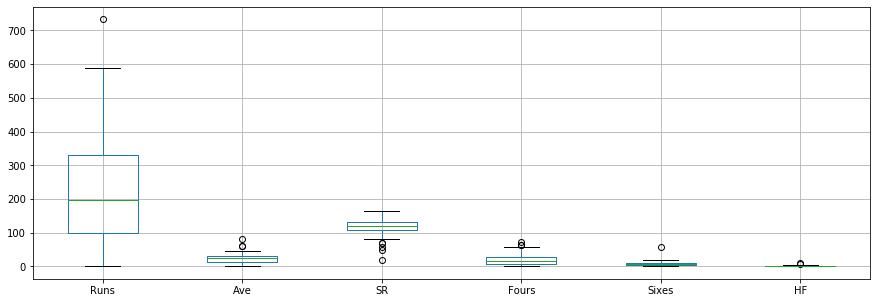

In [114]:
# Next onto plotting the box plot to see the variation in the data
battingDF.boxplot(figsize=(15,5))
        
# This boxplot shows that for a number of features there are outliers which we would have to treat
# also we will have to see the distribution for each feature and treat all these outliers
# So lets start one feature at a time

# some outliers are clearly visible, but lets understand the data distributions and plot boxplots

Quartile 1 98.0
Quartile 3 330.75
Inter Quartile Range 232.75
Lower Whisker is At: -251.125
Upper Whisker is At: 679.875


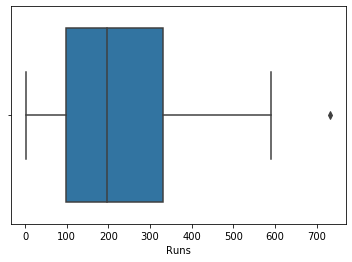

In [115]:
# First Feauture - RUNS
# Boxplot
lower, upper = boxplotVals(battingDF['Runs'])
sns.boxplot(battingDF['Runs']) # As seen above outlier exists

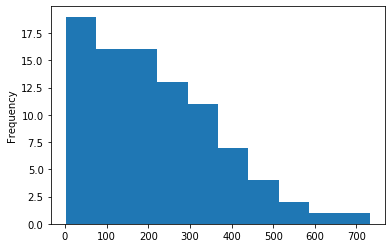

In [116]:
battingDF['Runs'].plot.hist() # majority of the batsman scored a total of 0, right skewed

#### I can be wrong here, but why would I treat outliers in a Ranking model, what if the person is doing a Fantastic Job and deserves a high score, a high average rate, high sixes, high no of fours etc. Not treating outliers as of now. Will do outlier correction and will measure the impact on the model later on.

Quartile 1 14.665
Quartile 3 32.19499999999999
Inter Quartile Range 17.529999999999994
Lower Whisker is At: -11.629999999999992
Upper Whisker is At: 58.48999999999998


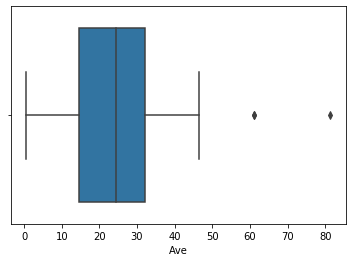

In [117]:
# Second Feauture - AVE
# Boxplot
lower, upper = boxplotVals(battingDF['Ave'])
sns.boxplot(battingDF['Ave']) 

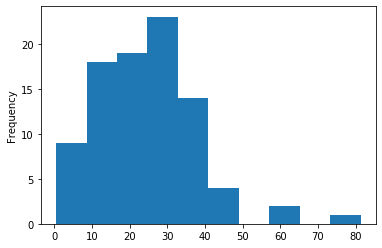

In [118]:
battingDF['Ave'].plot.hist()

Quartile 1 108.745
Quartile 3 131.9975
Inter Quartile Range 23.252499999999998
Lower Whisker is At: 73.86625000000001
Upper Whisker is At: 166.87625


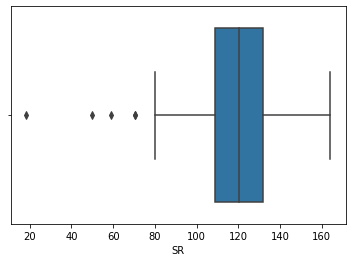

In [119]:
# Third Feauture - SR
# Boxplot
lower, upper = boxplotVals(battingDF['SR'])
sns.boxplot(battingDF['SR'])

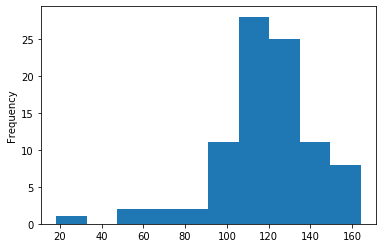

In [120]:
battingDF['SR'].plot.hist()

Quartile 1 6.25
Quartile 3 28.0
Inter Quartile Range 21.75
Lower Whisker is At: -26.375
Upper Whisker is At: 60.625


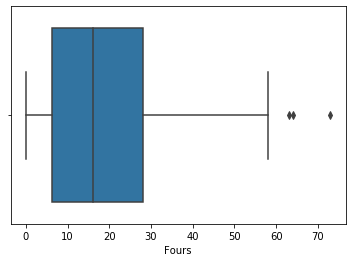

In [121]:
# Fourth Feauture - Fours
# Boxplot
lower, upper = boxplotVals(battingDF['Fours'])
sns.boxplot(battingDF['Fours']) # As seen above outlier exists

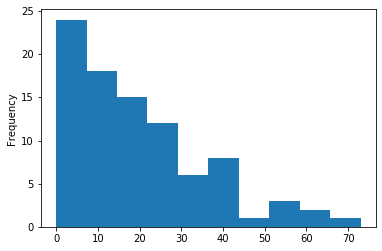

In [122]:
battingDF['Fours'].plot.hist() # majority of the batsman scored a total of 0, right skewed

Quartile 1 3.0
Quartile 3 10.0
Inter Quartile Range 7.0
Lower Whisker is At: -7.5
Upper Whisker is At: 20.5


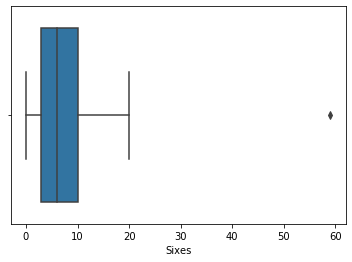

In [123]:
# Fifth Feauture - Sixes
# Boxplot
lower, upper = boxplotVals(battingDF['Sixes'])
sns.boxplot(battingDF['Sixes']) # As seen above outlier exists

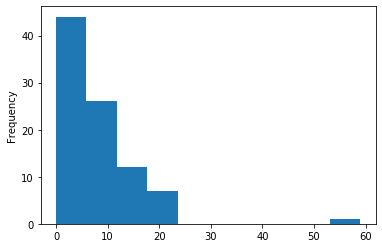

In [124]:
battingDF['Sixes'].plot.hist() # majority of the batsman scored a total of 0, right skewed

Quartile 1 0.0
Quartile 3 2.0
Inter Quartile Range 2.0
Lower Whisker is At: -3.0
Upper Whisker is At: 5.0


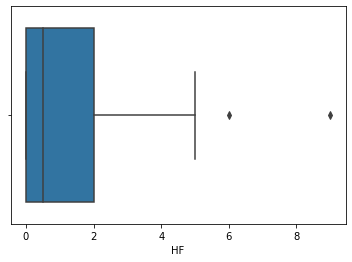

In [125]:
# Sixth Feauture - HF
# Boxplot
lower, upper = boxplotVals(battingDF['HF'])
sns.boxplot(battingDF['HF']) # As seen above outlier exists

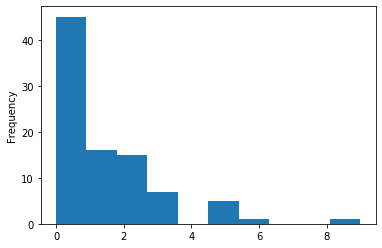

In [126]:
battingDF['HF'].plot.hist() # majority of the batsman scored a total of 0, right skewed

In [127]:
# now doing a correlation and a pairplot to understand the data better and see if we need to treat outliers

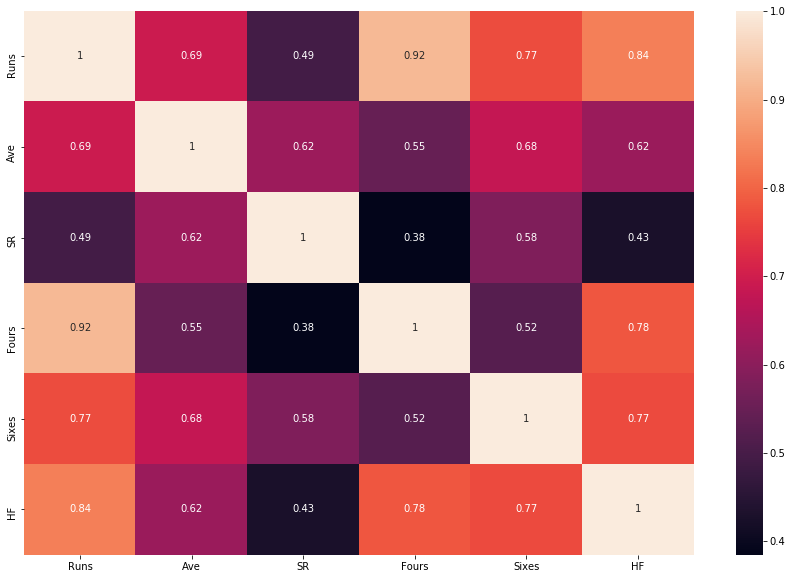

In [128]:
corr = battingDF.corr(method='pearson')
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)

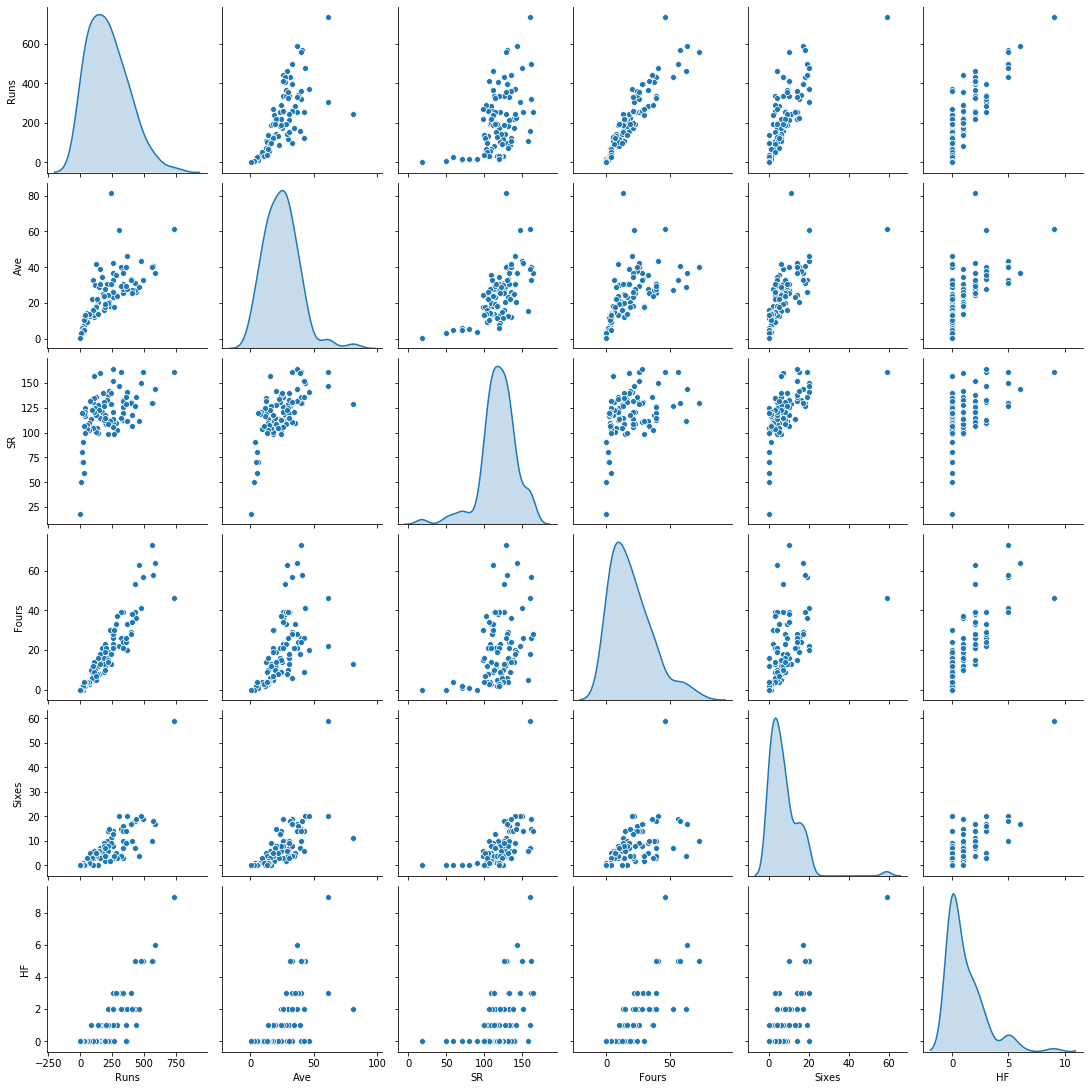

In [129]:
sns.pairplot(battingDF,diag_kind='kde')

### Findings on Pairplot and the Correlation HeatMap Data
1. The number of Fours, Sixes and Half Centuries you hit in a match helps you improve your Runs (Which is understandable)
2. Since I have not treated the outliers at this stage in these features (sixes, fours etc.) there are outlier dots appearing

## Ranking & Model Creation

Creating a Linear Regression model to predict the scores and will take all the features into account
From the look of it we can use Feature Importance Methods here to see how the model accuracy changes
as we keep on adding or removing the features i.e. we can use here the Forward Selection Method

In [130]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [131]:
XBdf = battingDF.drop(['Runs','Name'], axis = 1)
yBdf = battingDF['Runs']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(XBdf, yBdf, test_size=0.30, random_state=43)

In [133]:
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (63, 5) (63,)
Testing dataset shape: (27, 5) (27,)


In [134]:
# Build Linear Regression Model
linearModel = LinearRegression()

# Build step forward feature selection
featureSelector = sfs(linearModel, k_features=5, forward=True,scoring='r2', cv=5)

In [135]:
##### Perform Step Forward Feature Selection
featureSelector = featureSelector.fit(X_train.values, y_train.values)

featureSelector.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.88953516, 0.84466339, 0.80679777, 0.95193744, 0.82794255]),
  'avg_score': 0.8641752610549733,
  'feature_names': ('2',),
  'ci_bound': 0.06636638835232729,
  'std_dev': 0.05163530482244967,
  'std_err': 0.025817652411224835},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97350175, 0.85190907, 0.9438746 , 0.97583941, 0.95535203]),
  'avg_score': 0.9400953716375984,
  'feature_names': ('2', '3'),
  'ci_bound': 0.05866756594750591,
  'std_dev': 0.04564535943719779,
  'std_err': 0.022822679718598894},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97713803, 0.86326587, 0.94296592, 0.97686253, 0.95366415]),
  'avg_score': 0.9427793019959163,
  'feature_names': ('1', '2', '3'),
  'ci_bound': 0.053869145201791625,
  'std_dev': 0.04191202507890835,
  'std_err': 0.020956012539454175},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.96705292, 0.87162226, 0.95069183, 0.97585168, 0.95107758]),
  'avg_score': 0.9432592538405

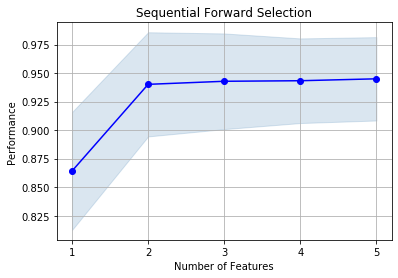

In [136]:
# Plot the Forward Feature Selector
fig = plot_sfs(featureSelector.get_metric_dict())

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

As you can see form the Graph Above with two features we get a model accuracy of 94%. The maximum model accuracy with all features is 94.49%. So we will select only two features out of the above. Let's look at how to select the two features.

I even ran the above model when we fix the outliers the improvement in accuracy was negligible e.g. with 2 features the max accuracy before and after outlier correction was 94%, the max accuracy however improved by 0.5% i.e. before fixing the outliers it was 94.49%, after fixing the outliers it improved to 95%. 

Adding the code to show I did that too.

battingDF.loc[battingDF['Runs']>679.87, 'Runs'] = 679 

battingDF.loc[battingDF['Ave']>58.48, 'Ave'] = 58 

battingDF.loc[battingDF['SR']<73.86, 'SR'] = 73 

battingDF.loc[battingDF['Fours']>60.62, 'Fours'] = 60 

battingDF.loc[battingDF['Sixes']>20.5, 'Sixes'] = 20 

battingDF.loc[battingDF['HF']>5, 'HF'] = 5 


making these equal to the upper/lower whisker i.e. max or min rather than mean or median since that would dilute 
the performance impact for the individual

In [137]:
# Which features? we need to choose finally.
columnList = list(X_train.columns)
feat_cols = list(featureSelector.k_feature_idx_)
print(columnList)
print(feat_cols)

['Ave', 'SR', 'Fours', 'Sixes', 'HF']
[0, 1, 2, 3, 4]


1.  We know from the dictionary listing above that col. no 2 and 3 are the top two columns that give us 95% accuracy
2.  Columns i.e. Fours and Sixes - the number of batsman that has the most has the highest score

# PART THREE : Q & A

##### Q1. List down all dimensionality reduction techniques that can be implemented using python ?

Yes in order to reduce the dimensionality of the data the following techniques I can think of:

1. PCA - This helps create new features based on existing features
2. Feature Selection - Using techniques such as forward selection, backward selection etc.
3. Variance Thresholding - We can check for variance of the features and keep the one with a high variance
4. Ensemble Techniques - We can create models like decision tree, gradient boosting etc. and then use model.feature_importances_ to understand which features did the model consider as most important
5. Manual Selection - You can use pair plots see which features make sense and then use 1 Sample T-Tests and check p-value to see which features are most important and which can be removed. 

#### Q2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.

Yes it is possible to use PCA on Image and Multimedia Data. For Multimedia data we can think of it like frames per second i.e. 30 or 60 frames per second so those are also images and can be treated the same way. e.g. for MNIST digit recognition the following high level steps can be used:

1. Each image is comprised of pixels i.e 784 x 784
2. Each pixel can take a range of values 16 monochrome colors
3. Each pixels can be thought of a as big matrix which is 784 x 784
4. Each of the cells in the matrix can take values from 1 thru 16 in this example
5. This would make a dataframe which can then be passed onto a PCA
6. PCA would then take this and pass it to a model (SVM, KMeans etc.) for classifying the row in the dataframe accordingly

An example could be the PCA IRIS Dataset

In [138]:
from sklearn import datasets

In [139]:
iris = datasets.load_iris()
demo = pd.DataFrame(iris.data)
demo.columns = iris.feature_names
demo['target'] = iris.target

In [140]:
pca = PCA(n_components=4)
transformedX = pca.fit_transform(X)

In [141]:
pca.explained_variance_ratio_

array([0.96125431, 0.01629978, 0.01156029, 0.00316043])

#### Here we can see that IRIS is also an image dataset where we measured the dimensions of the flowers. This is not exactly like an image recognition but close to it in the sense here we have taken the measures manually using dimensions and have then classified those measures to do PCA and come up with new features. In an image however there are libraries which will be used to measure the same elements but at a pixel level.

#### In this feature - PC1 itself account for 96% of the Variation of the data and can be used - classic example of how strong PCA is.